### **Set Up**

import the libraries

In [1]:
import numpy as np                   #for data analysis
import pandas as pd                 #for data manuplation 
import matplotlib.pyplot as plt     #for data visualization and analysis
import seaborn as sns

In [2]:
from pathlib import Path                #for directory and path
import sys                              #to use system path with pathlib
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))

#for load reusable function from other folder
import importlib
import src.Fraud_detection as prep

Coloring

In [3]:
#Manually collor assignment
Red = "\033[31m"
Green = "\033[32m"
Orange = "\033[33m"
Blue = "\033[34m"
Yellow = "\033[33m"
Cyan = "\033[36m"
Reset = "\033[0m"

Load the dataset

In [4]:
path = project_dir / "data"
data_df = prep.lead_data(path / "creditcard.csv")

### **Exploratory Data Analysis(EDA)**

<font color="greenyellow">To understand the dataset</font>

**Correlation**

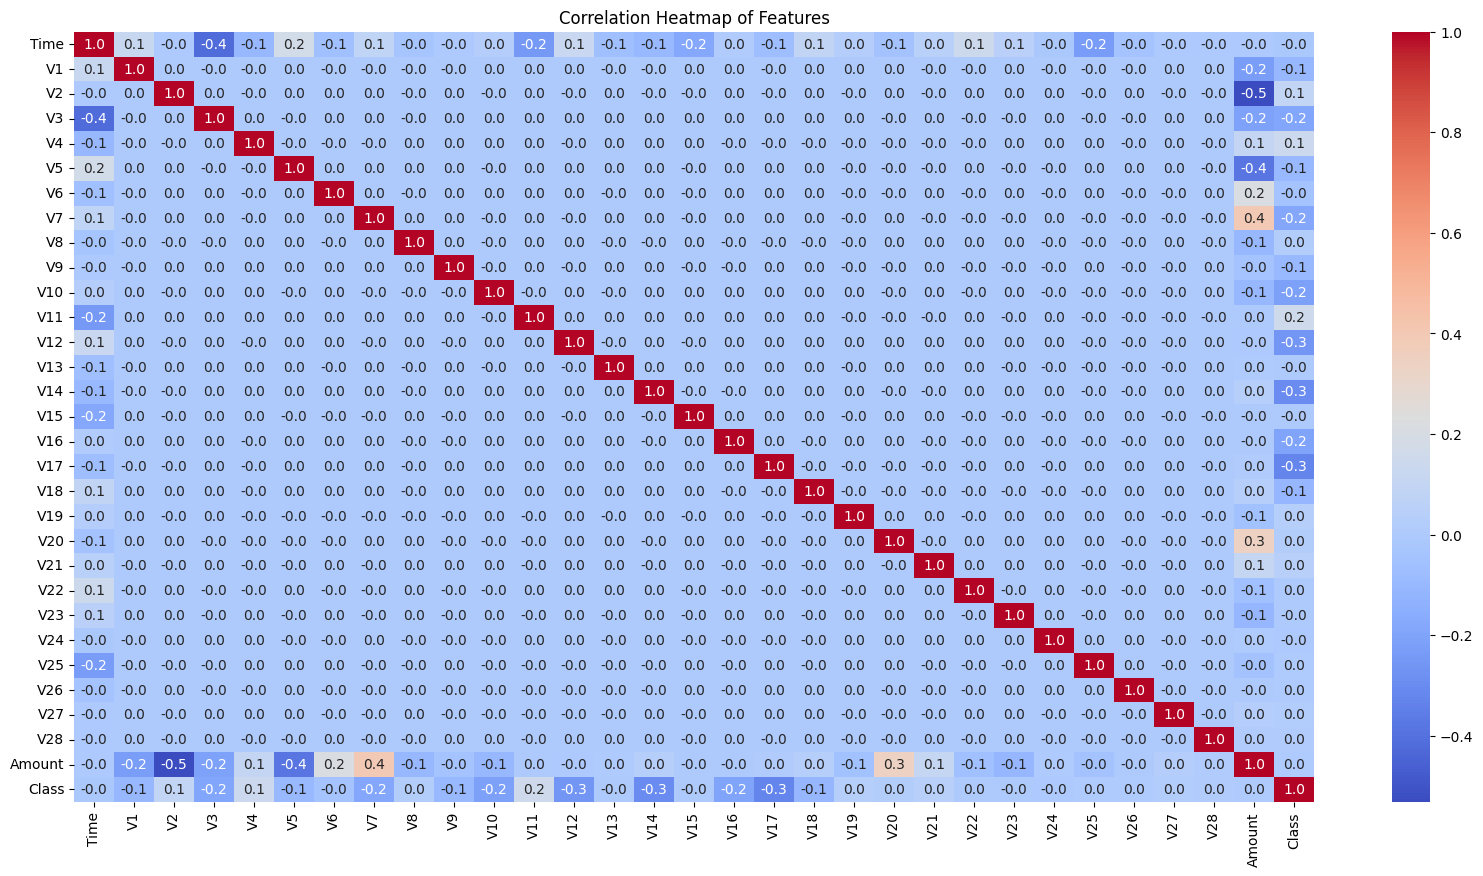

In [22]:
#correlation using heatmap
prep = importlib.reload(prep)

prep.correlation_plot(data_df)

In [ ]:
#Observation: 
    #The target variable have positive(V2, V4, V11) and negative(V1, V3, V7,V14, V17) linear relationship with some features
    #most features have no linear relationship

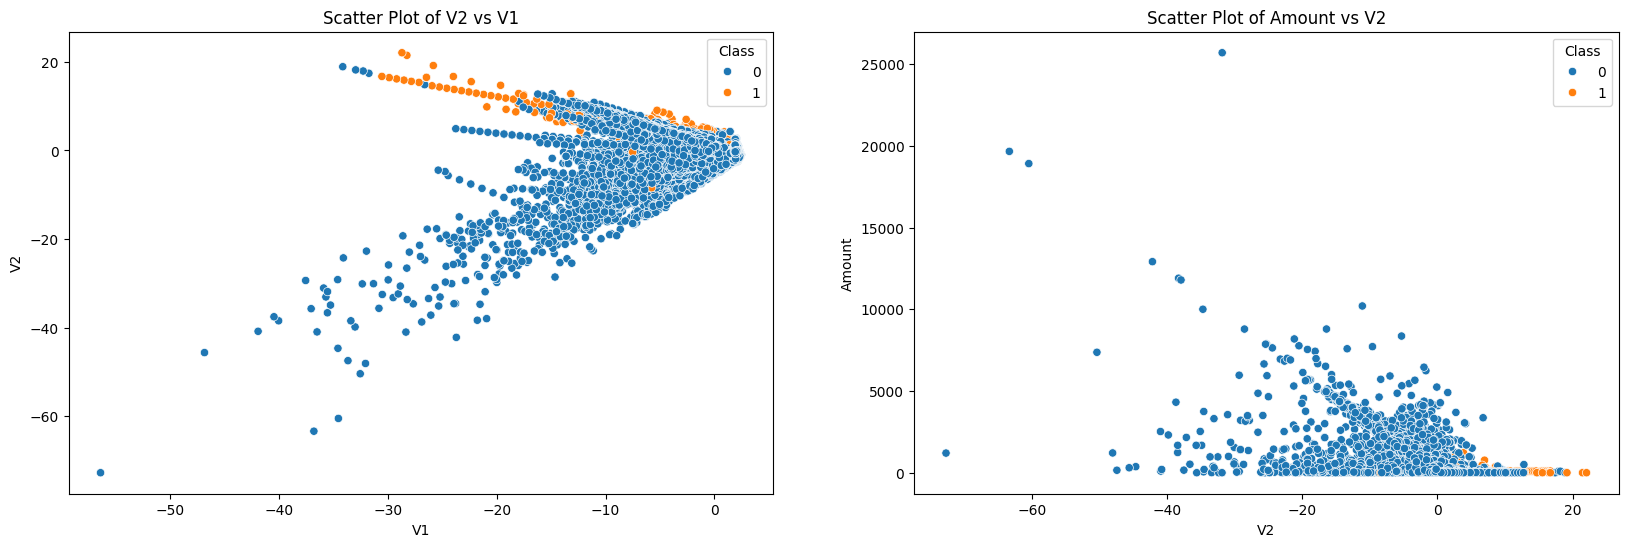

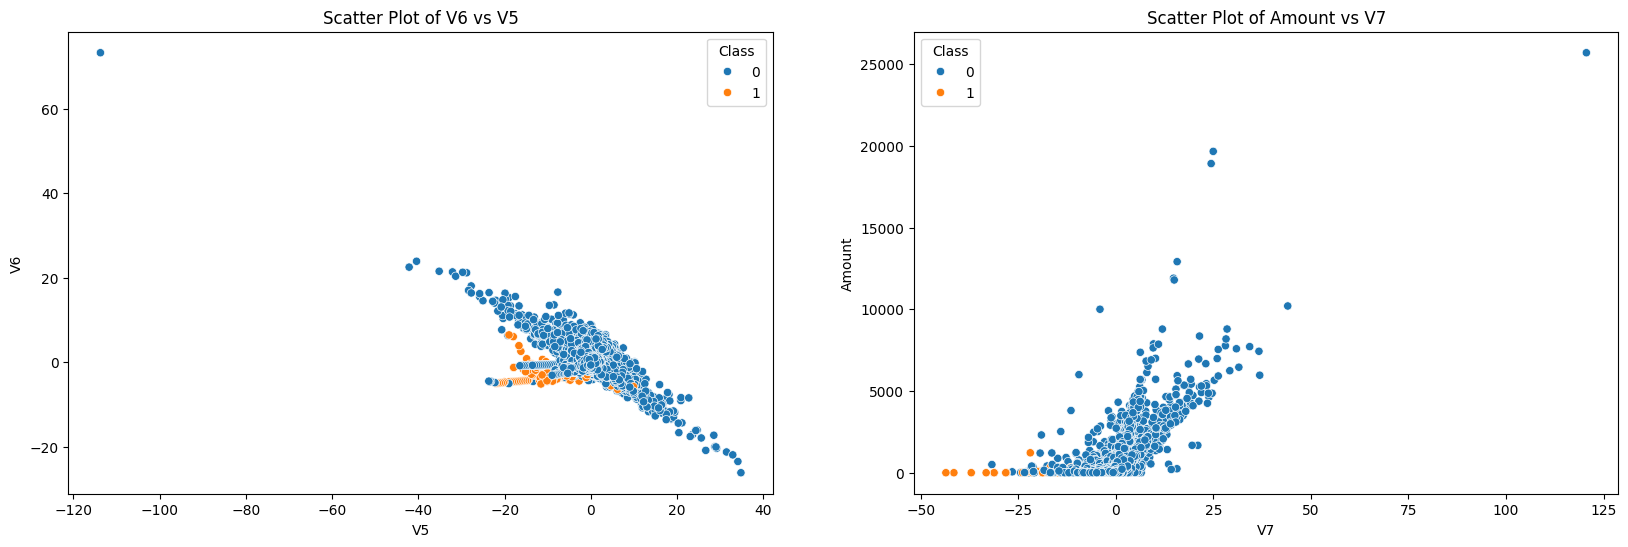

In [23]:
#scatter plot to show the relation of the features with target variable and vice versal
prep = importlib.reload(prep)    #every time i must relaod the other files

prep.scatter_plot(data_df, x1="V1", y1="V2", x2="V2", y2="Amount", hue="Class")
prep.scatter_plot(data_df, x1="V5", y1="V6", x2="V7", y2="Amount", hue="Class")

In [ ]:
#Observation from the scatter plot:
    #plot v2 vs v1 and Amount Vs V7 have positive linear relationship.
    #V6 vs V5 and Amount Vs V2 have negative relationship and for V6 Vs V5 the fraud transaction are made around at V6 =0
    #foth both graph have an outliers

**Statistical Analysis**

In [8]:
statical_group1 = data_df.describe().iloc[:, :10]
statical_group2 = data_df.describe().iloc[:, 10:21]
statical_group3 =data_df.describe().iloc[:, 21:]
display(statical_group3)

,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Distribution of the data**

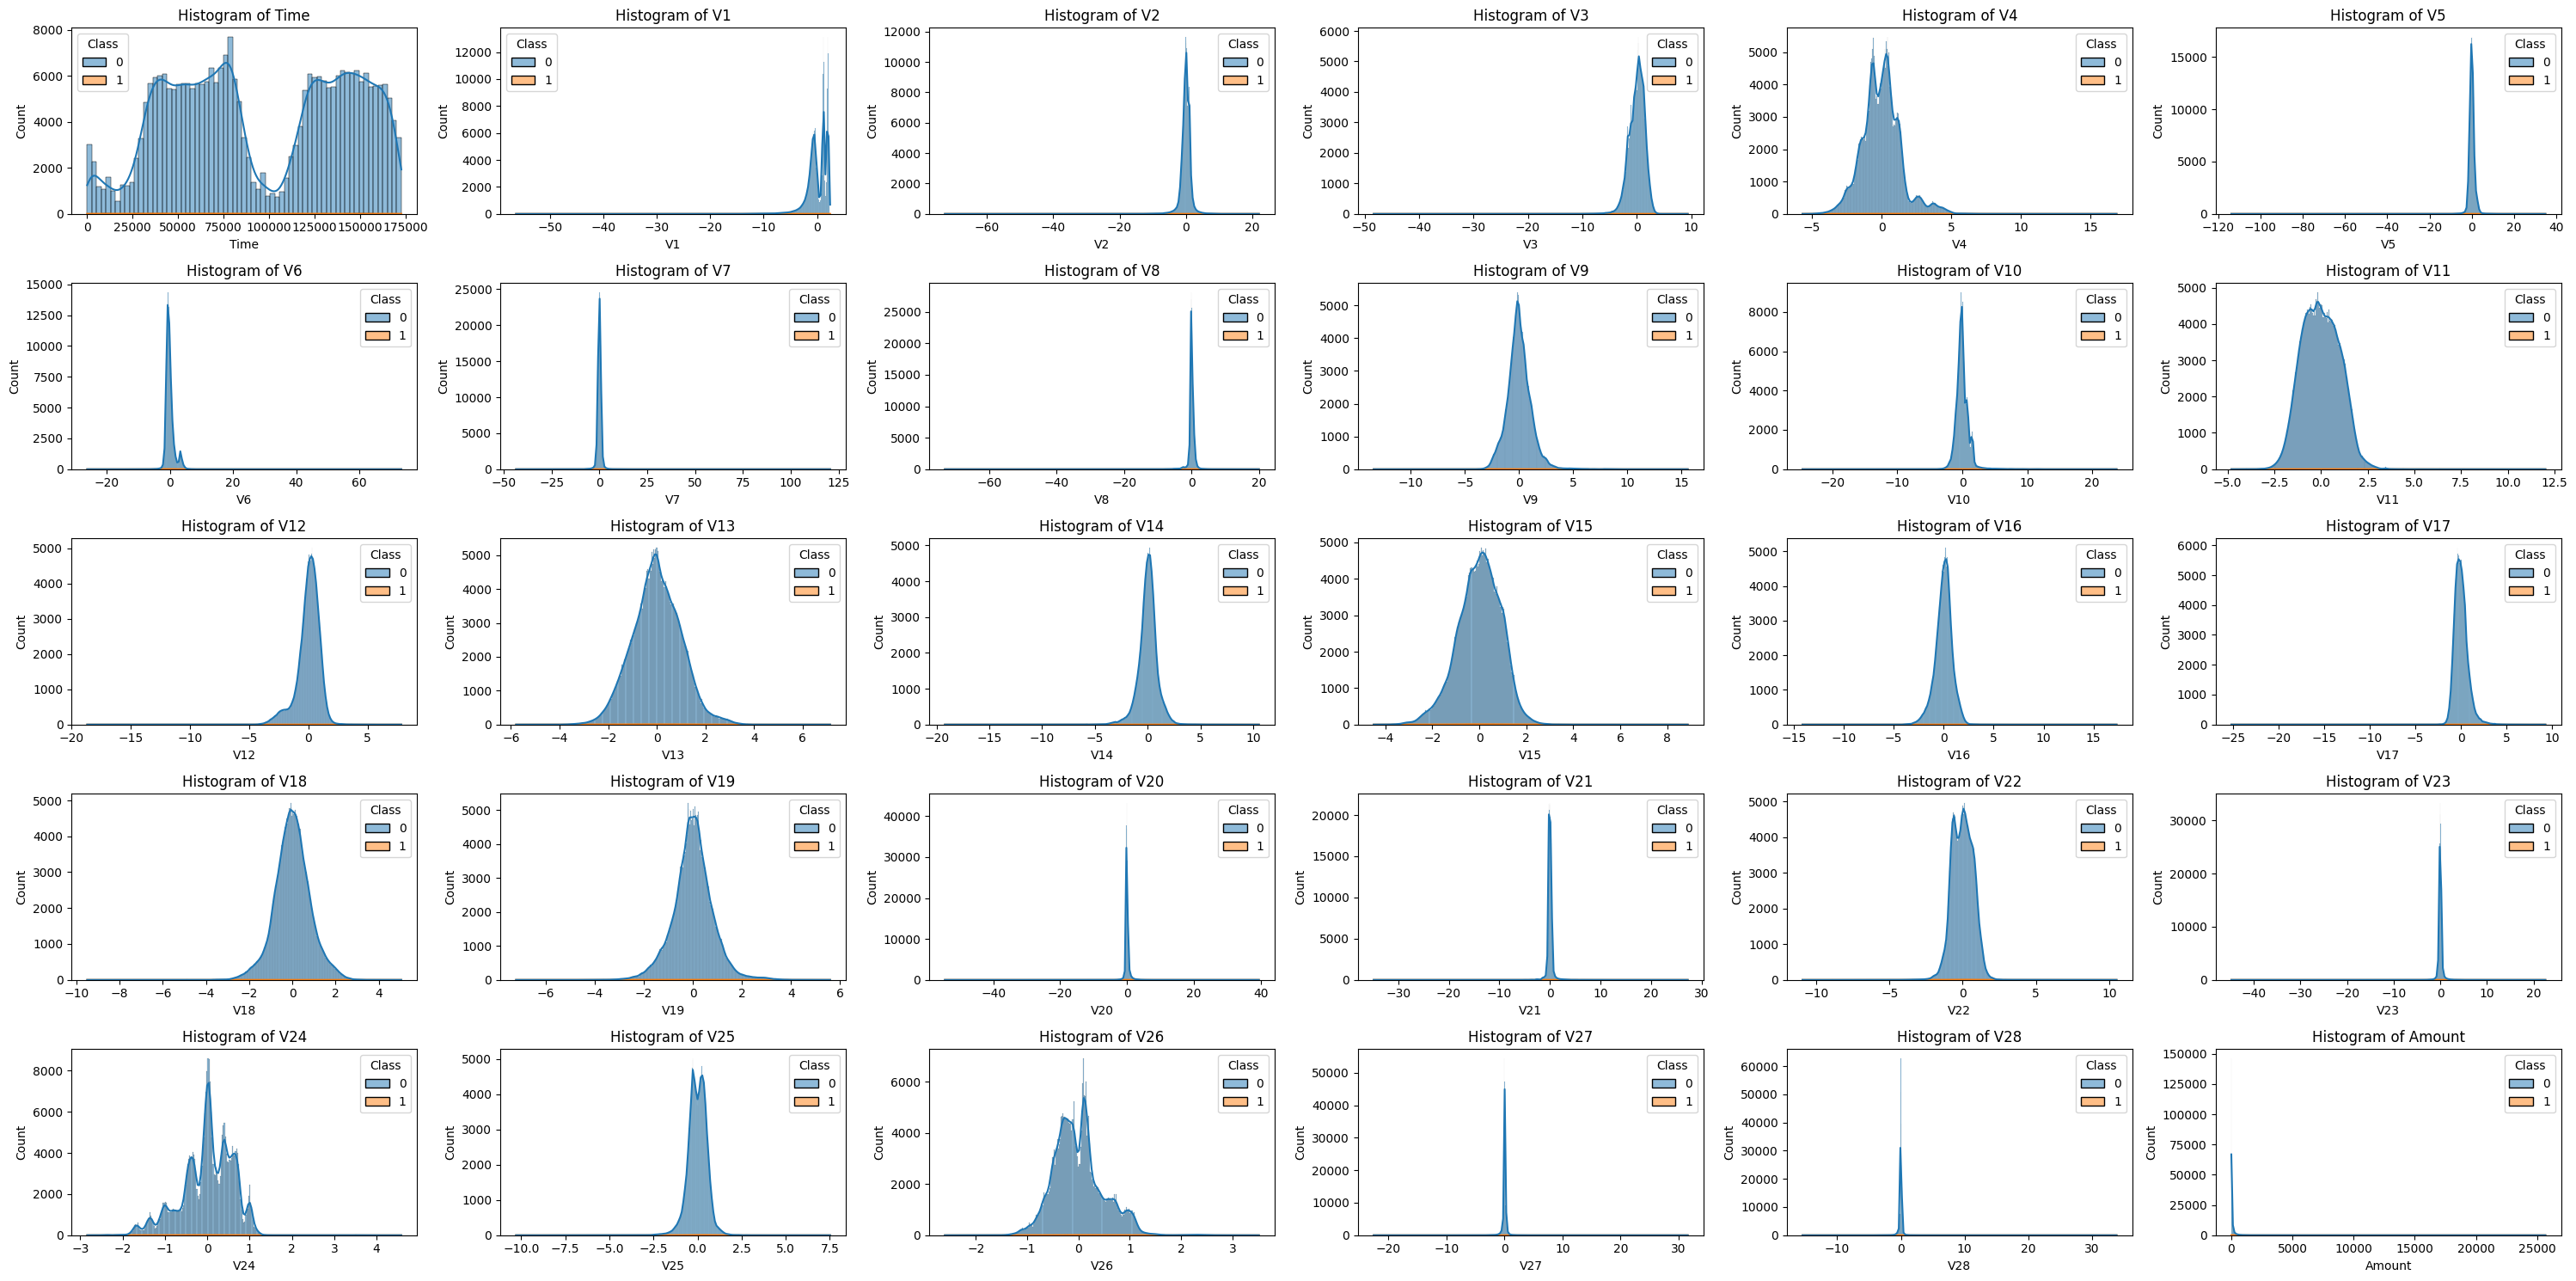

In [38]:
#distribution of the dataset using histplot
prep = importlib.reload(prep)
prep.data_dist(data_df, data_df.drop("Class", axis=1).columns)

In [ ]:
#Observation: there is a massive class imbalance(almost fraud cases are very rare compared to non-fraud cases)
    #some features are right skewed(Amount,V6 , V7)
    #for left skewed(V1, V5, V8, V23)

In [5]:
frauded_df = data_df[data_df["Class"]==1]
legitmate_df = data_df[data_df["Class"]==0]
#this is one category of to split the dataset into legitmate transaction and

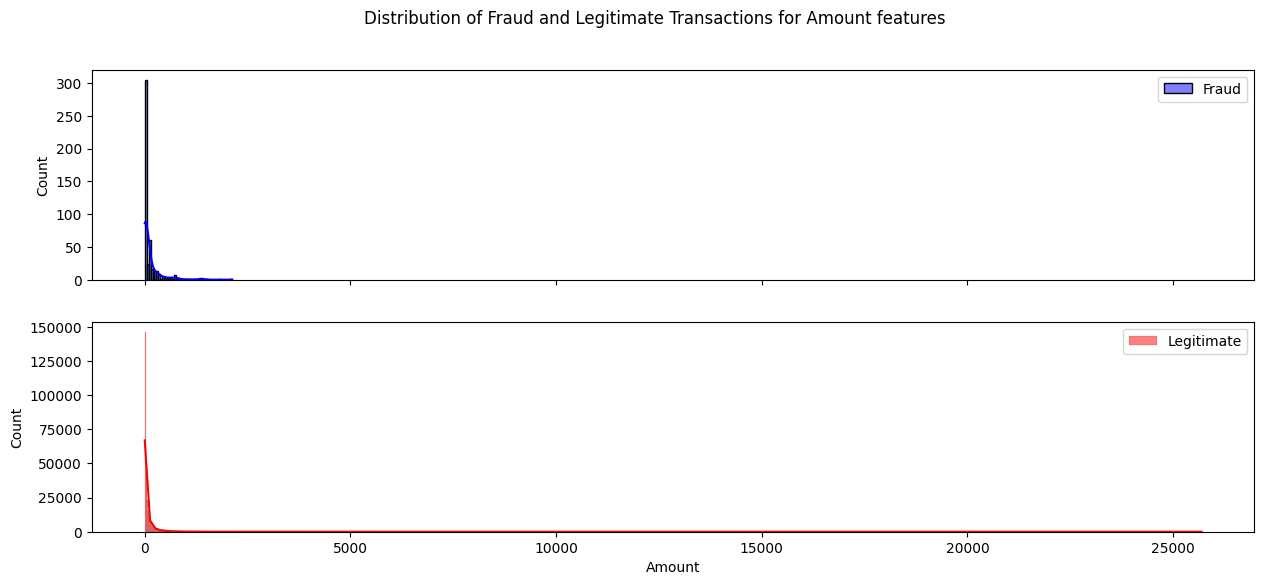

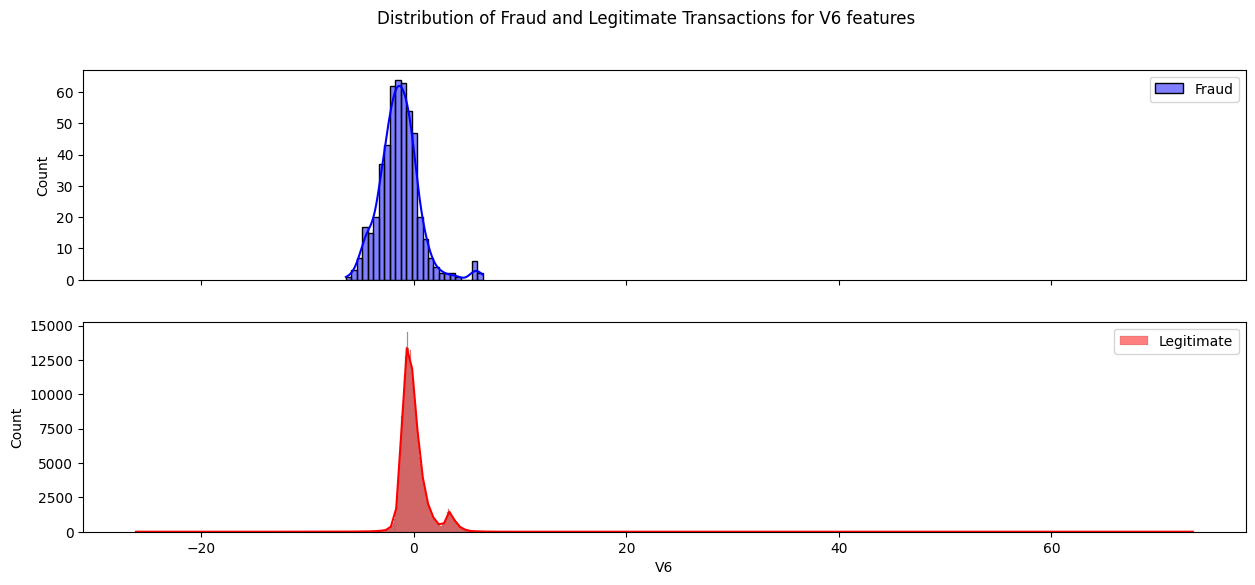

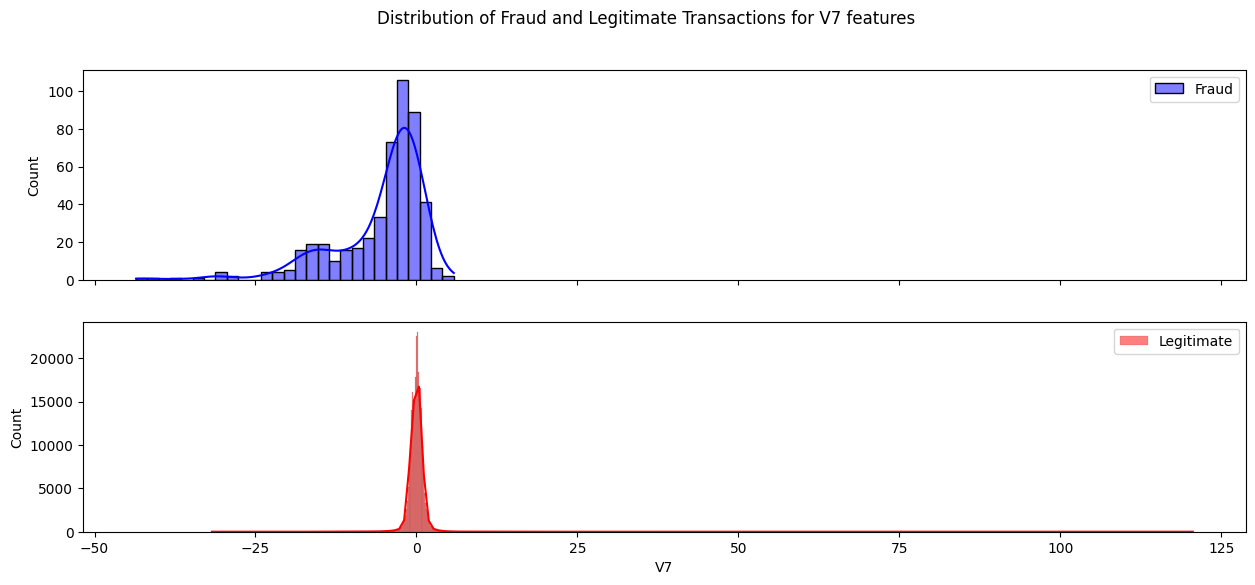

In [10]:
prep = importlib.reload(prep)

#right skewed features
right_skewed = ["Amount", "V6", "V7"]
for i in right_skewed:
    prep.plot_in_pair(frauded_df[i], legitmate_df[i])

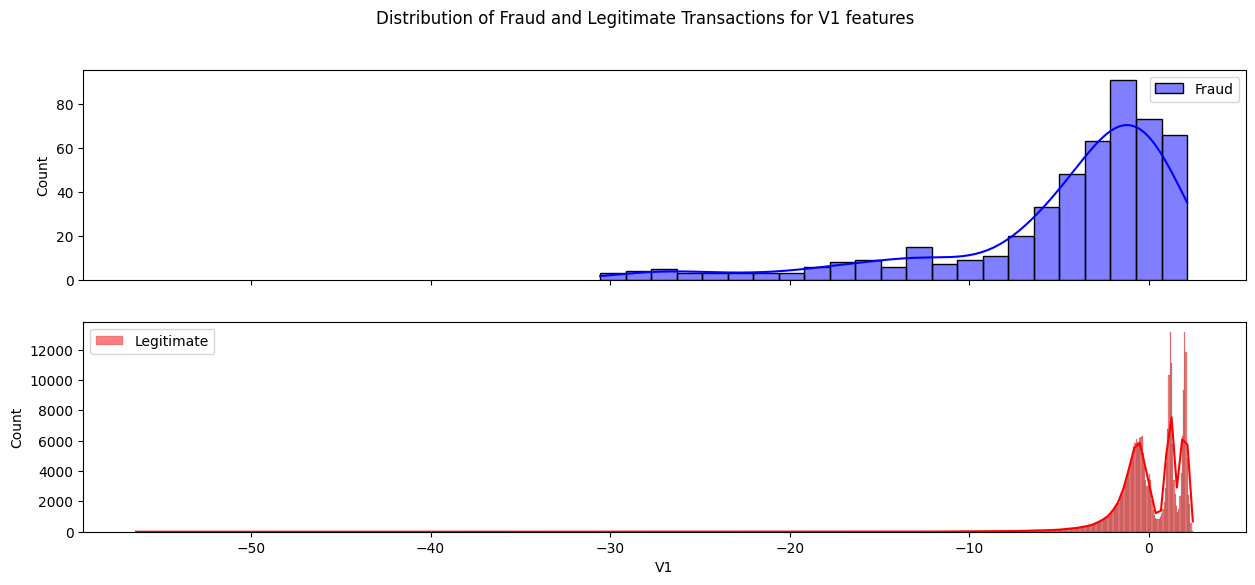

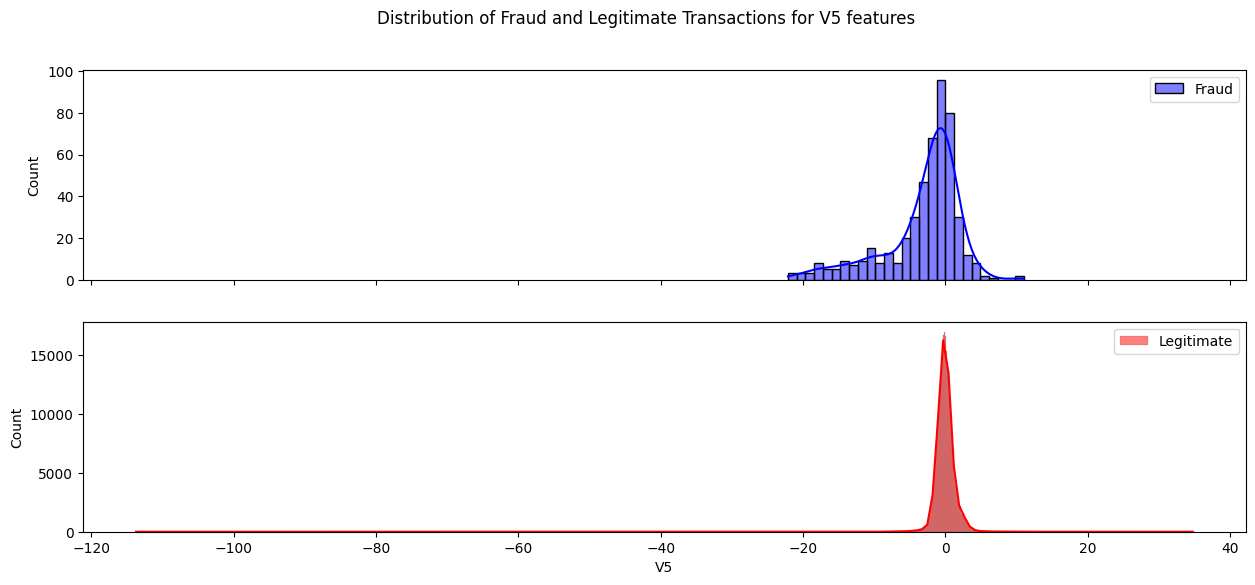

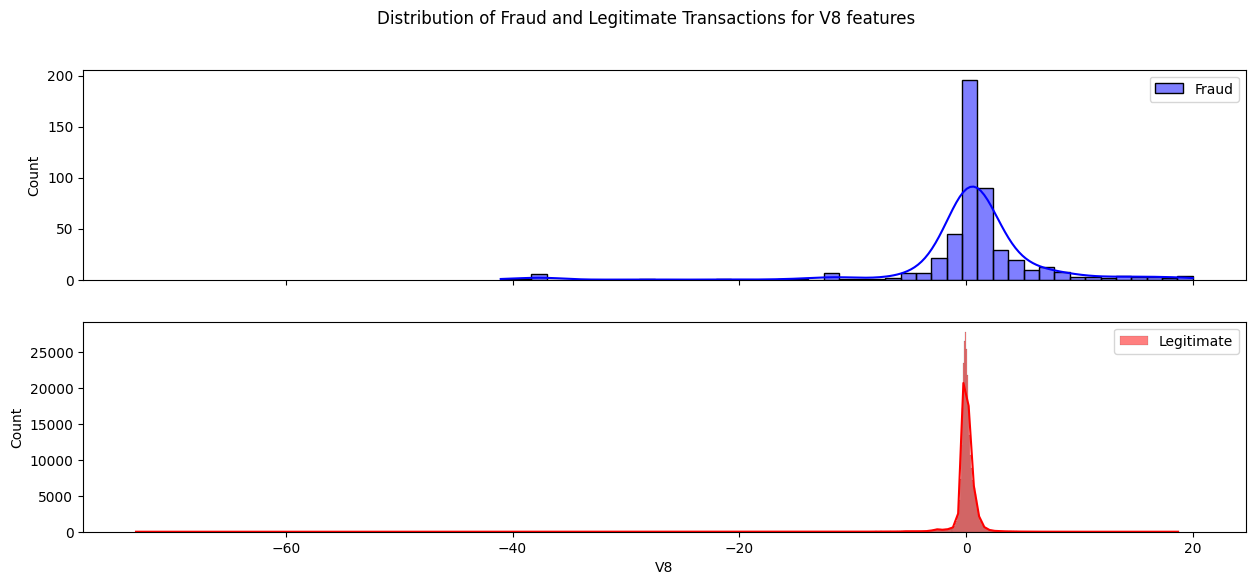

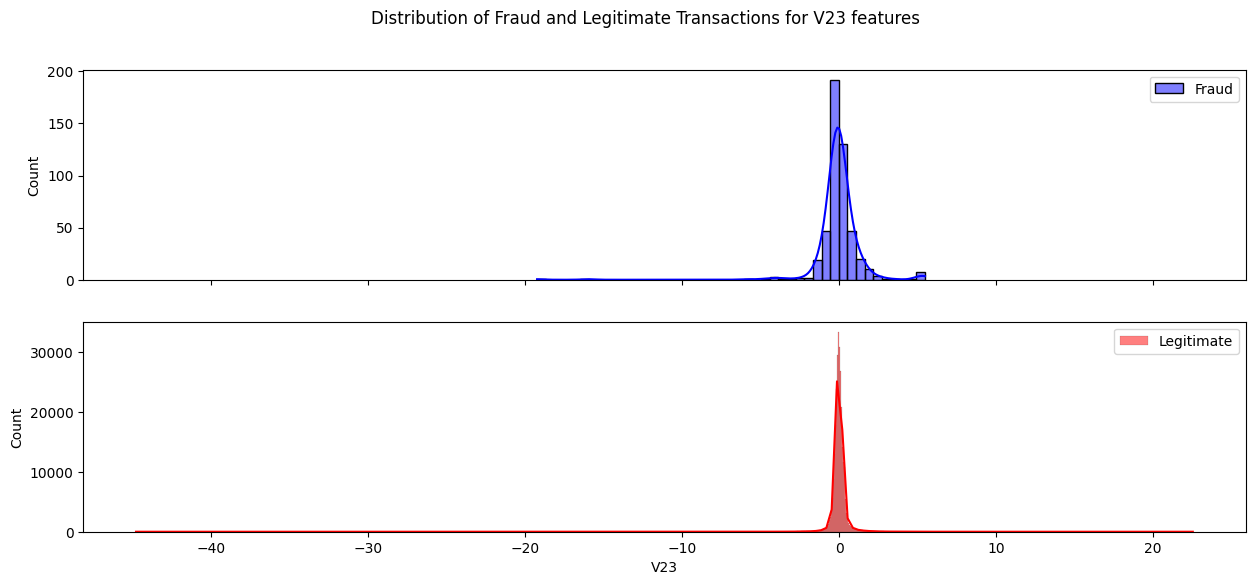

In [11]:
prep = importlib.reload(prep)

#left skewed features
left_skewed = ["V1", "V5", "V8", "V23"]

for i in left_skewed:
    prep.plot_in_pair(frauded_df[i], legitmate_df[i])

In [ ]:
#Observation: the legitmate transaction are more skewed and outliered than fraud transaction.
            #removing to handle outlier are risky(loss important data)

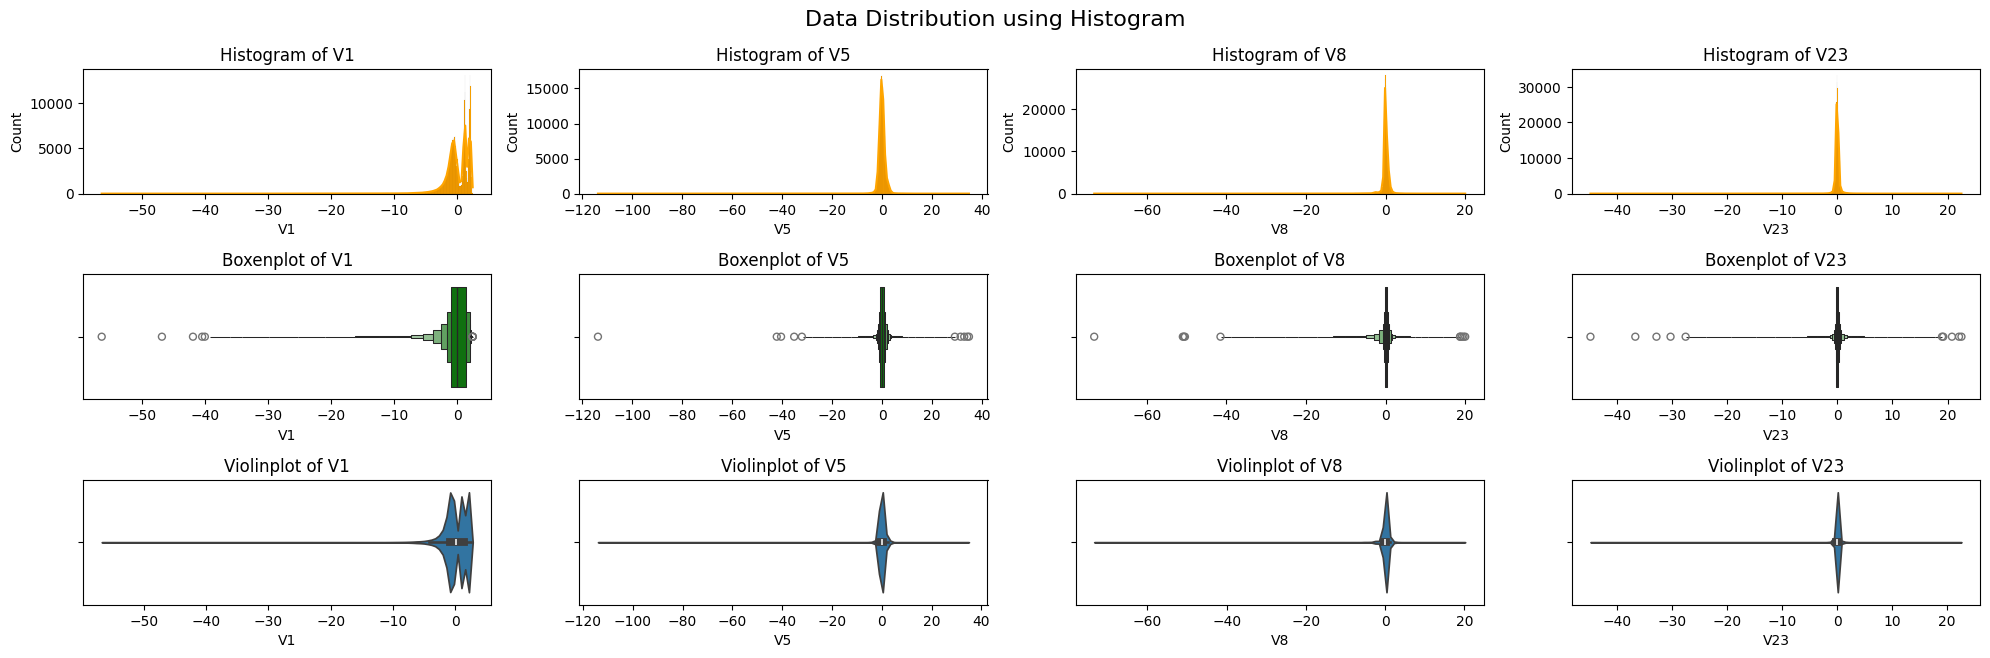

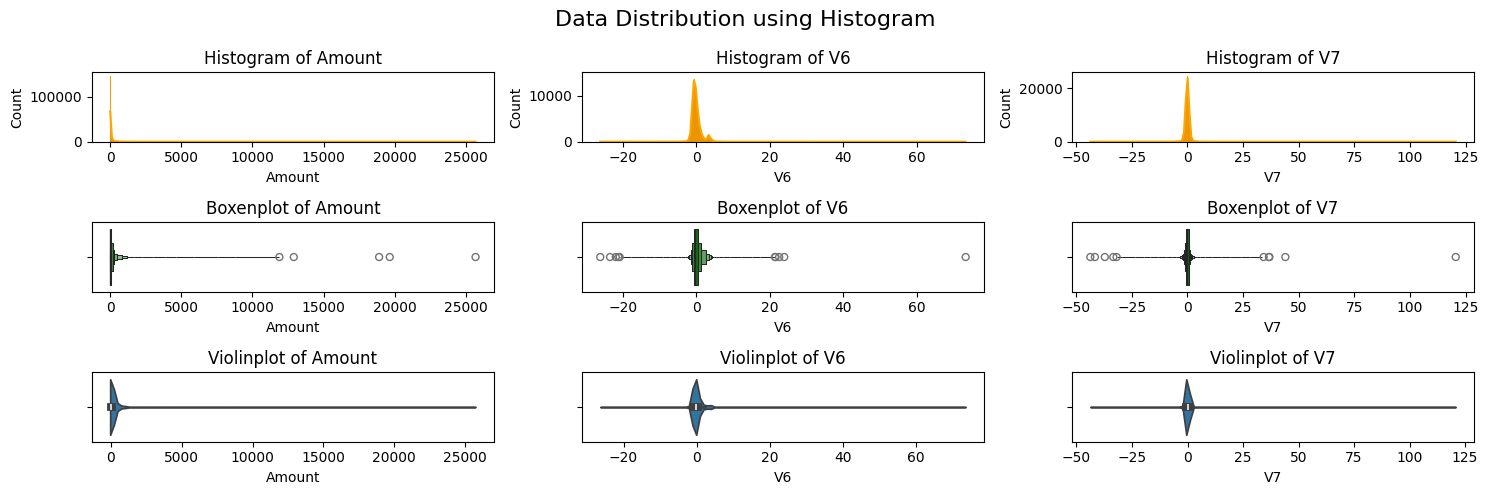

In [13]:
prep = importlib.reload(prep)
prep.sub_plots(data_df[left_skewed], left_skewed)
prep.sub_plots(data_df[right_skewed], right_skewed)

In [83]:
#Detecting the outlier of the dataset
prep = importlib.reload(prep)

cols = data_df.columns
outliered_rows, outliered_col, outlier_element = prep.detect_outlier(data_df[cols], cols)
print(f"{Green} Outliered Rows:    {Reset}", outliered_rows.shape)
print(f"{Green} Outliered Columns: {Reset}", outliered_col.shape)
print(f"{Green}Original data Dim:  {Reset} { data_df.shape}")
print(f"{Green} Dimetnsion Ration: {Red}{data_df.shape[0]/outliered_col.shape[0]:.3f}{Reset}")
display(outliered_col.columns)

 Outliered Rows:     (138488, 31)
 Outliered Columns:  (138488, 30)
Original data Dim:   (284807, 31)
 Dimetnsion Ration: 2.057


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [79]:
#Observation: 
        #all Columns have outliered values exept "Time" feature.
        #More than half of the entire rows of the dataset are treated as outliers
#Conclusion: based on the above two facts removing the outliers are not suitable technique it is risky(lossing of neccesary information)

In [81]:
outlier_counts = outlier_element.sum()
outlier_counts_ordered = outlier_counts.sort_values(ascending=False)      #the panda seres sorted by thier outlierd 
outlier_counts_col = outlier_counts_ordered.index.to_numpy()              #change type to numpy array to access the columns

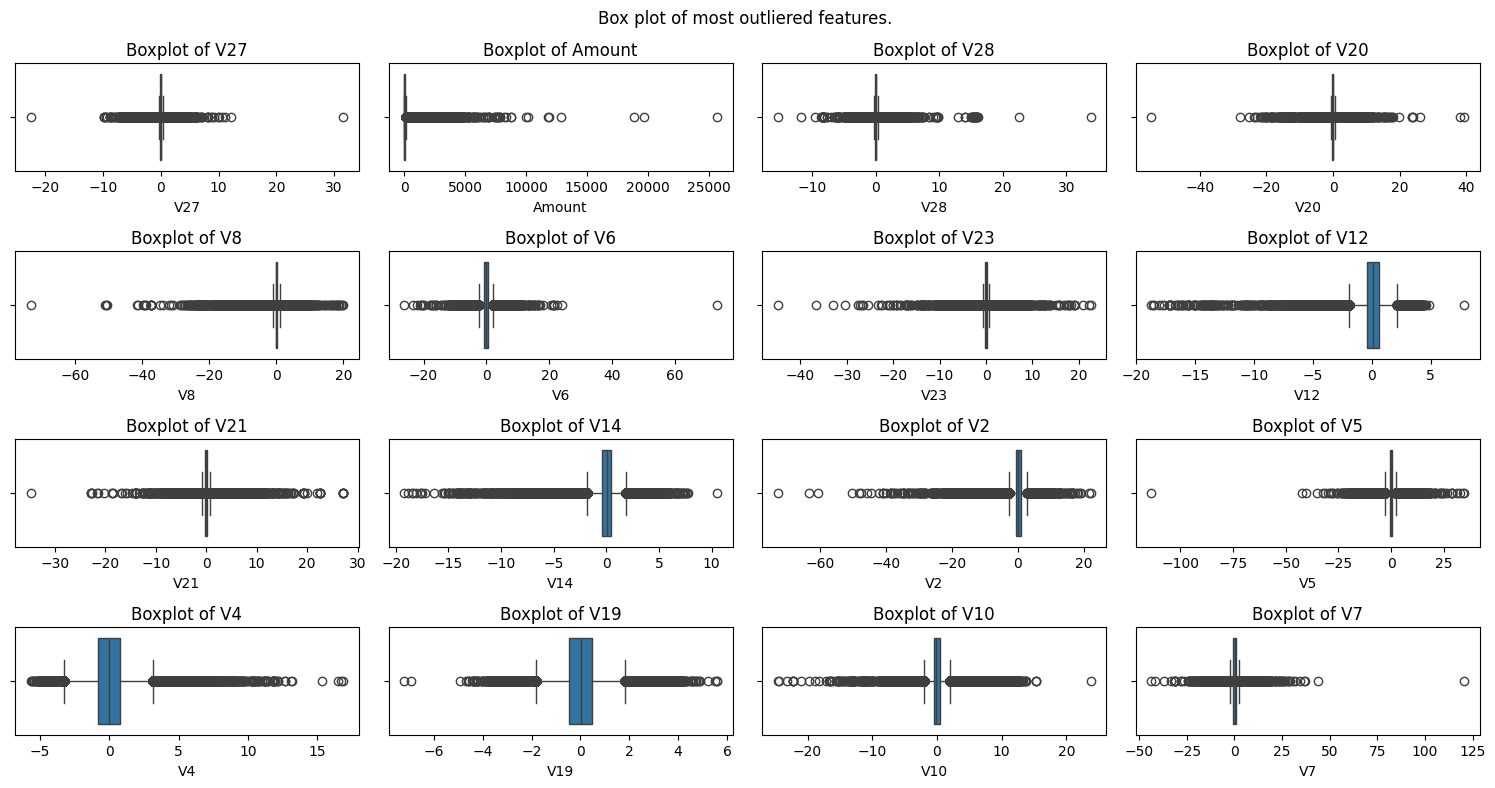

In [60]:
prep = importlib.reload(prep)

prep.box_plot(data_df[outlier_counts_col[:16]],4 ,4, 15, 8, outlier_counts_col[:16])

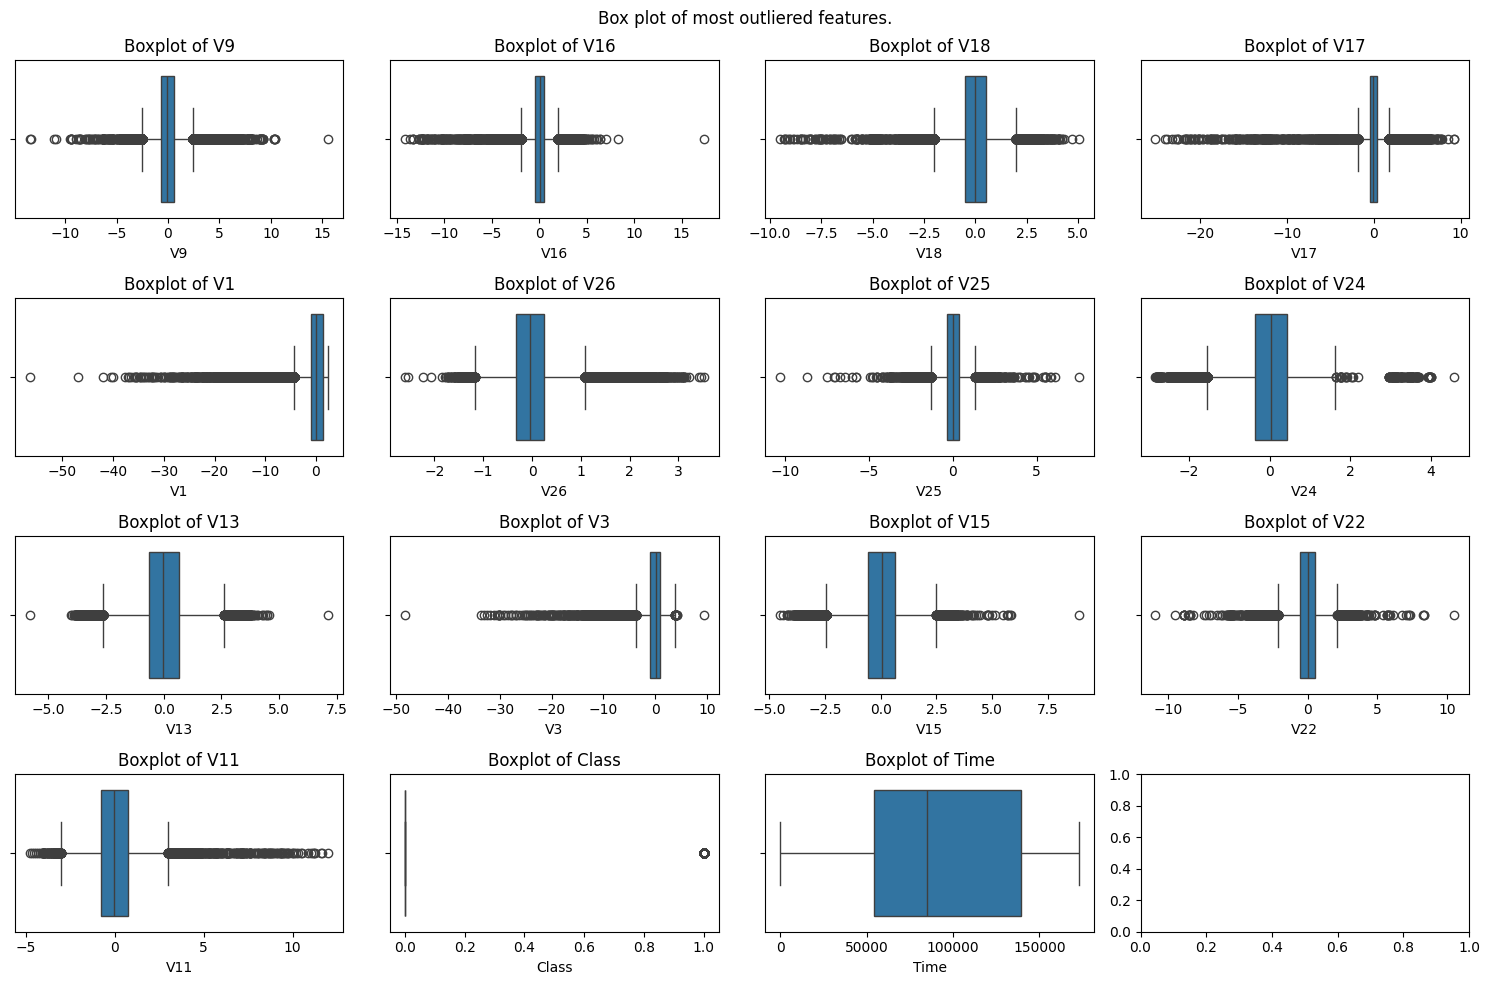

In [62]:
prep = importlib.reload(prep)

prep.box_plot(data_df[outlier_counts_col[16:32]],4 ,4, 15, 10, outlier_counts_col[16:])

In [ ]:
#Observation:
    #again most data are treated as outlier and drop this data is risky and not suitable instead i have to use other technique like transformation(for linear and distance sensitive model)
    #and it is fine for tree based models(decision tree, random forest and like)


### **Cleaning and Preprocessing**


##### **Handling Outliers**

In [ ]:
#The proper way to handle this outlier are transformation(log transformation)
    #This will help in reducing the skewness and making the data more normally distributed
    #Only amount features would be log transformation the other is PCA componetns(not recommended to transform)

In [5]:
#log transform for Amount feature
data_df['Amount'] = np.log1p(data_df['Amount'])

In [5]:
#befor perform any cleaning operation the data must be splited into train and test part to prevent data likage.

from sklearn.model_selection import train_test_split
features = data_df.drop('Class', axis=1)
labels = data_df['Class']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
prpe = importlib.reload(prep)

x_train_scaled, x_test_scaled = prep.scaler(x_train, x_test, type="Robust")

In [7]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)   #change to dataframe 
x_test_scaled =pd.DataFrame(x_test_scaled, columns=x_test.columns)

## <font color="yellowgreen">**Train and evaluate the model**</font>

### **Train the Model**

**Train and evaluate the model without handling the class imbalance Using Linear and Tree based Models**

In [ ]:
prep = importlib.reload(prep)

#Tarin logistic regression
log_reg_model = prep.train_models(x_train_scaled, y_train, which_model="Log_regression")

#Make prediction
lin_train_pred, lin_test_pred = prep.predict_model(log_reg_model, x_train_scaled, x_test_scaled)

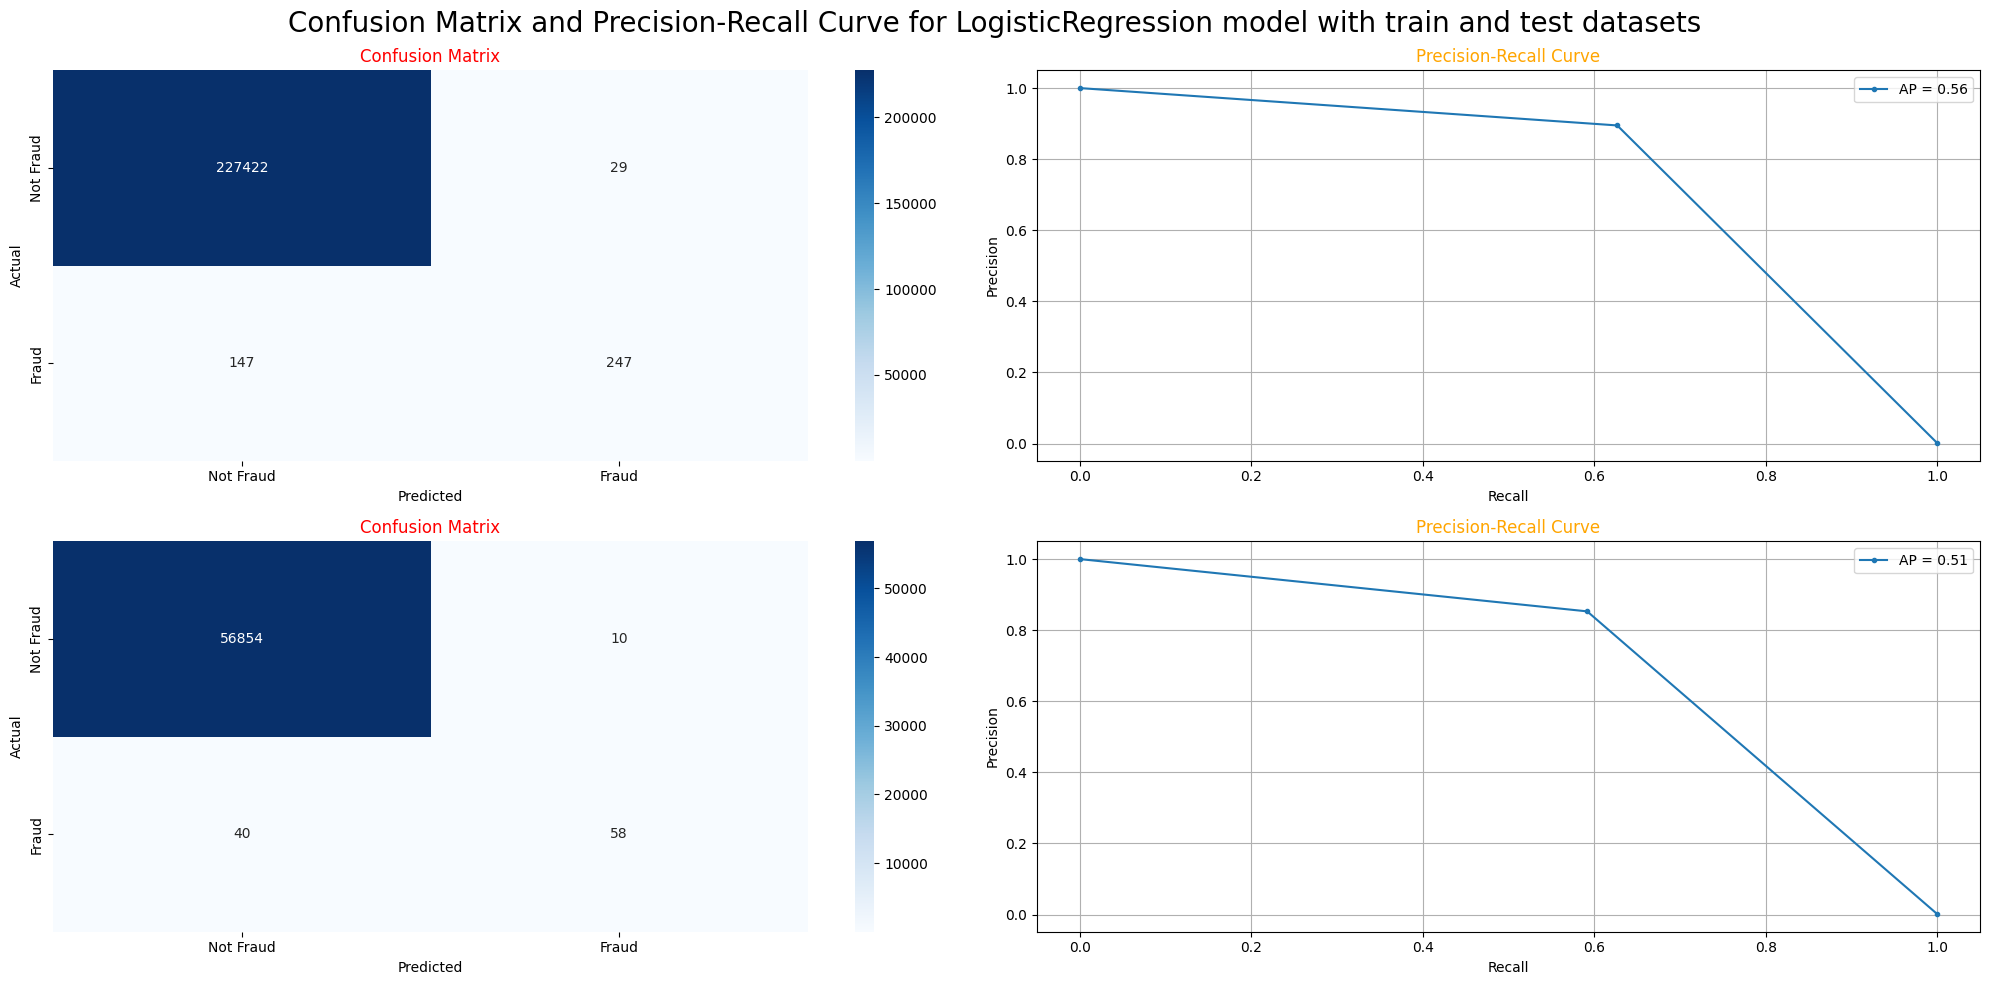

<Figure size 640x480 with 0 Axes>

In [31]:
prep = importlib.reload(prep)

#for logistic regression model
prep.confusionM_RP_plot(y_train,lin_train_pred, y_test, lin_test_pred, model="LogisticRegression")


In [ ]:
#Observation:
    #for logistic regression false positive is larger than false negative(FP>FN)
    #41% of Fraud are missed which shows the model strugle class imbalance.

In [ ]:
prep = importlib.reload(prep)

#Train knn model
knn_model = prep.train_models(x_train_scaled, y_train, which_model="KNN")

#Make prediction
knn_train_pred, knn_test_pred = prep.predict_model(knn_model, x_train_scaled, x_test_scaled)

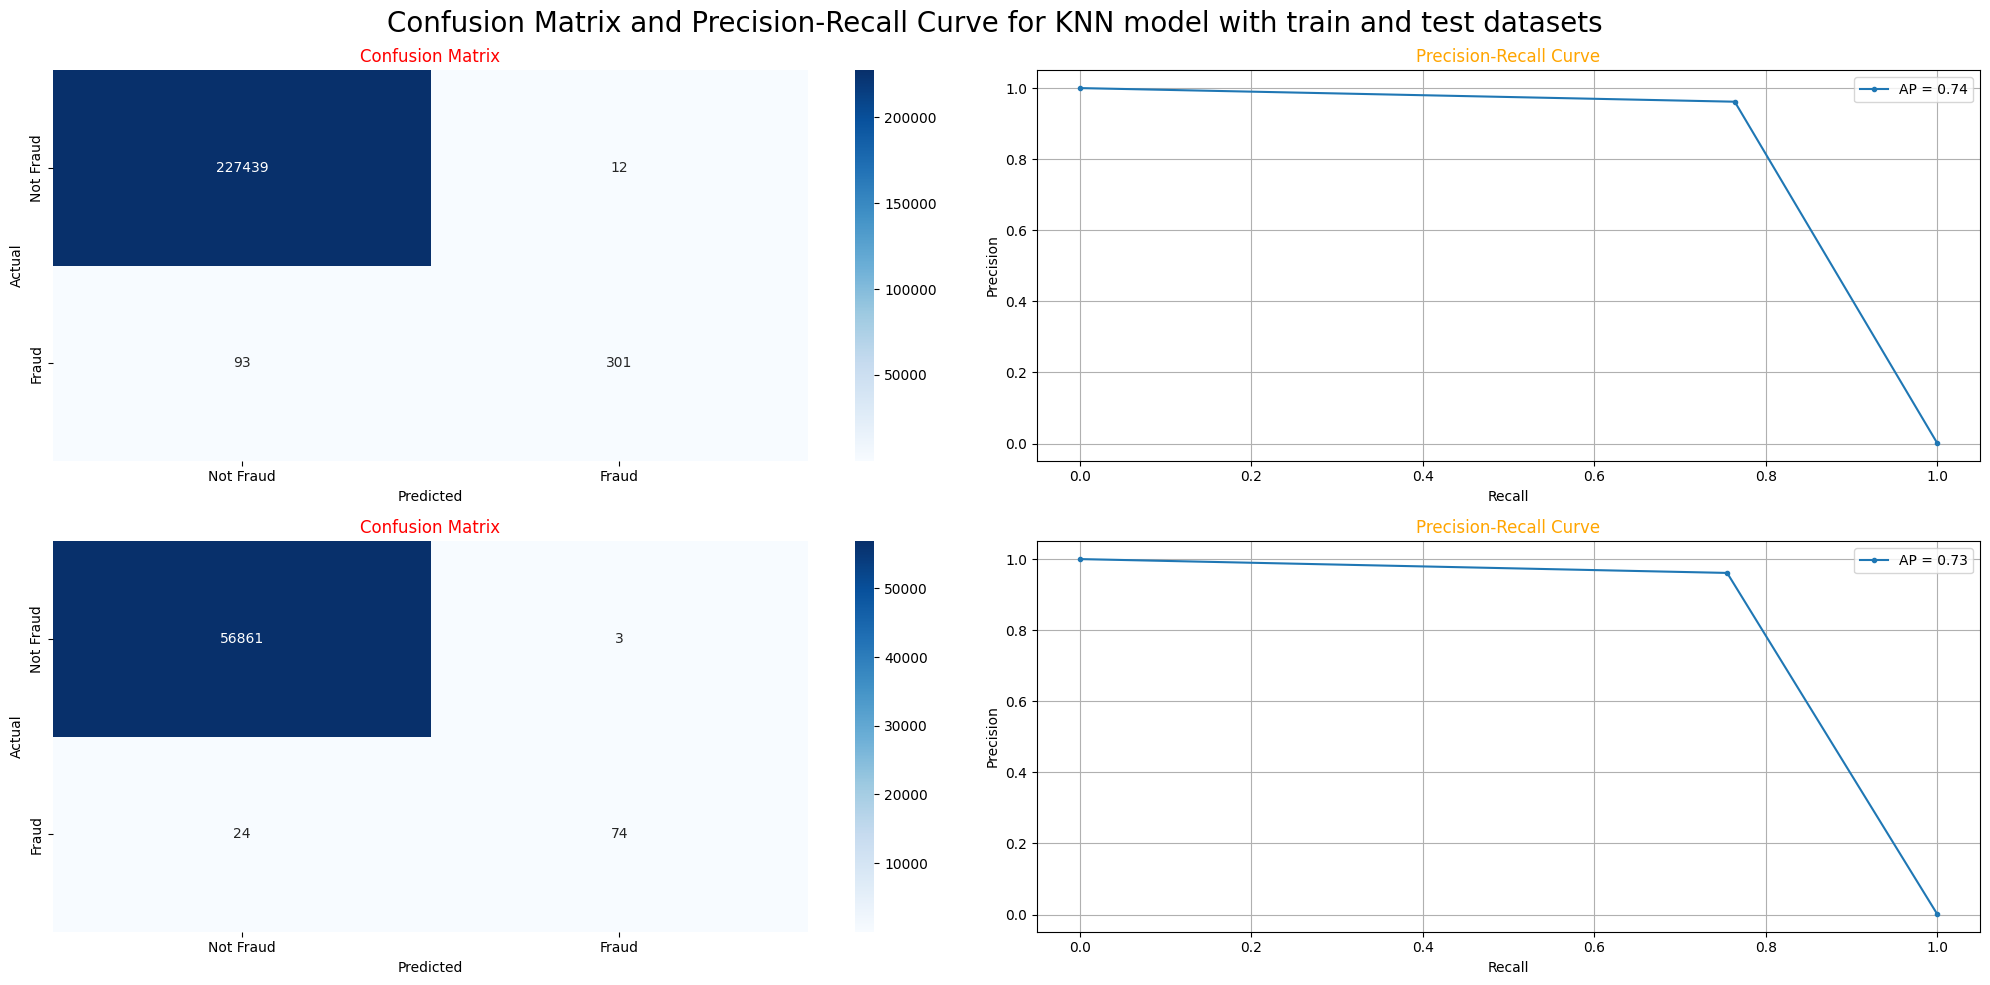

<Figure size 640x480 with 0 Axes>

In [29]:
#for KNN model
prep = importlib.reload(prep)
prep.confusionM_RP_plot(y_train, knn_train_pred, y_test, knn_test_pred, model="KNN")

In [ ]:
#Observation:
    #Overall the model are not overfitted (generalization is good)
    #25% of Fraud are missed which is better than logistic regression(41% missed)
    #while this model are not suitable for large dataset

In [35]:
prep = importlib.reload(prep)

#train using scaled featues and unscaled featurs
DT_scaled_model = prep.train_models(x_train_scaled, y_train, which_model="Decision_Tree")
DT_unscaled_model = prep.train_models(x_train, y_train, which_model="Decision_Tree")

#Make prediction with scaled dataset
DT_train_pred = prep.predict_model(DT_scaled_model, x_train_scaled)
DT_test_pred = prep.predict_model(DT_scaled_model, x_test_scaled)

#Make prediction with unscaled dataset
DT_train_pred_unscaled = prep.predict_model(DT_unscaled_model, x_train)
DT_test_pred_unscaled = prep.predict_model(DT_unscaled_model, x_test)

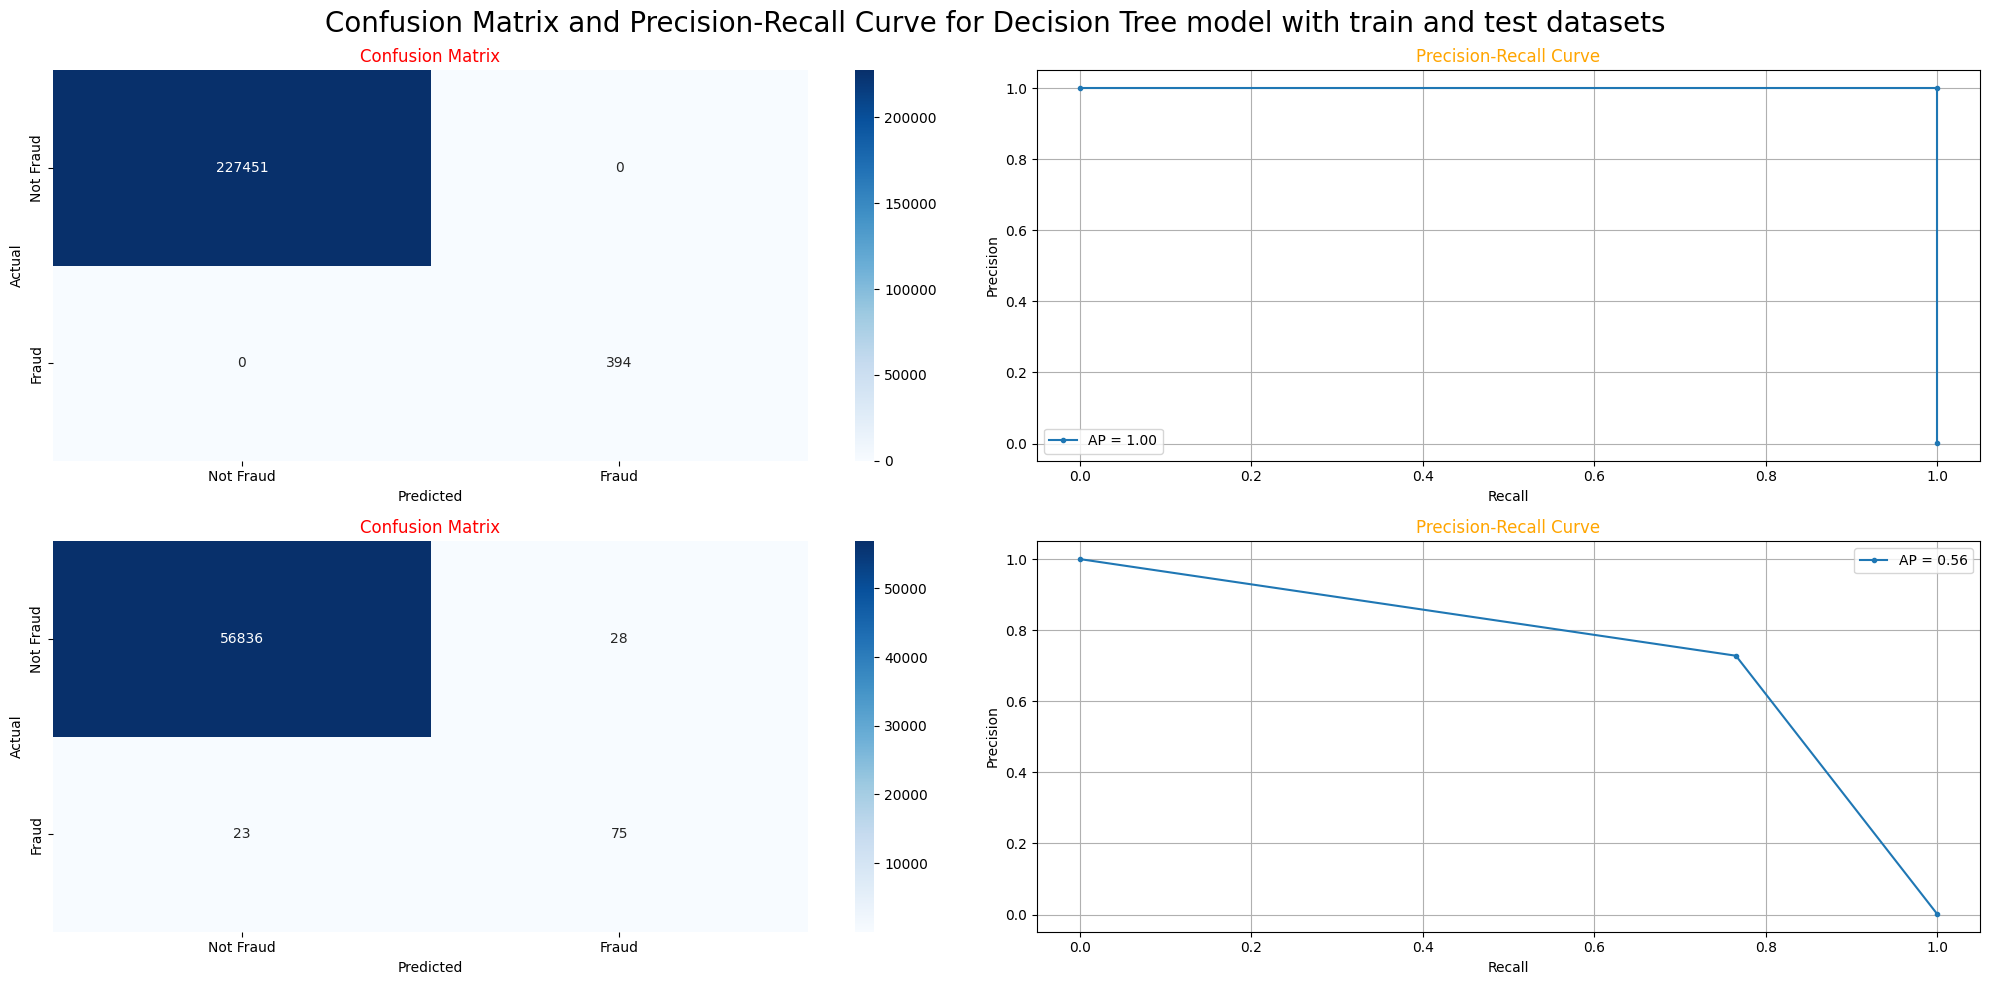

<Figure size 640x480 with 0 Axes>

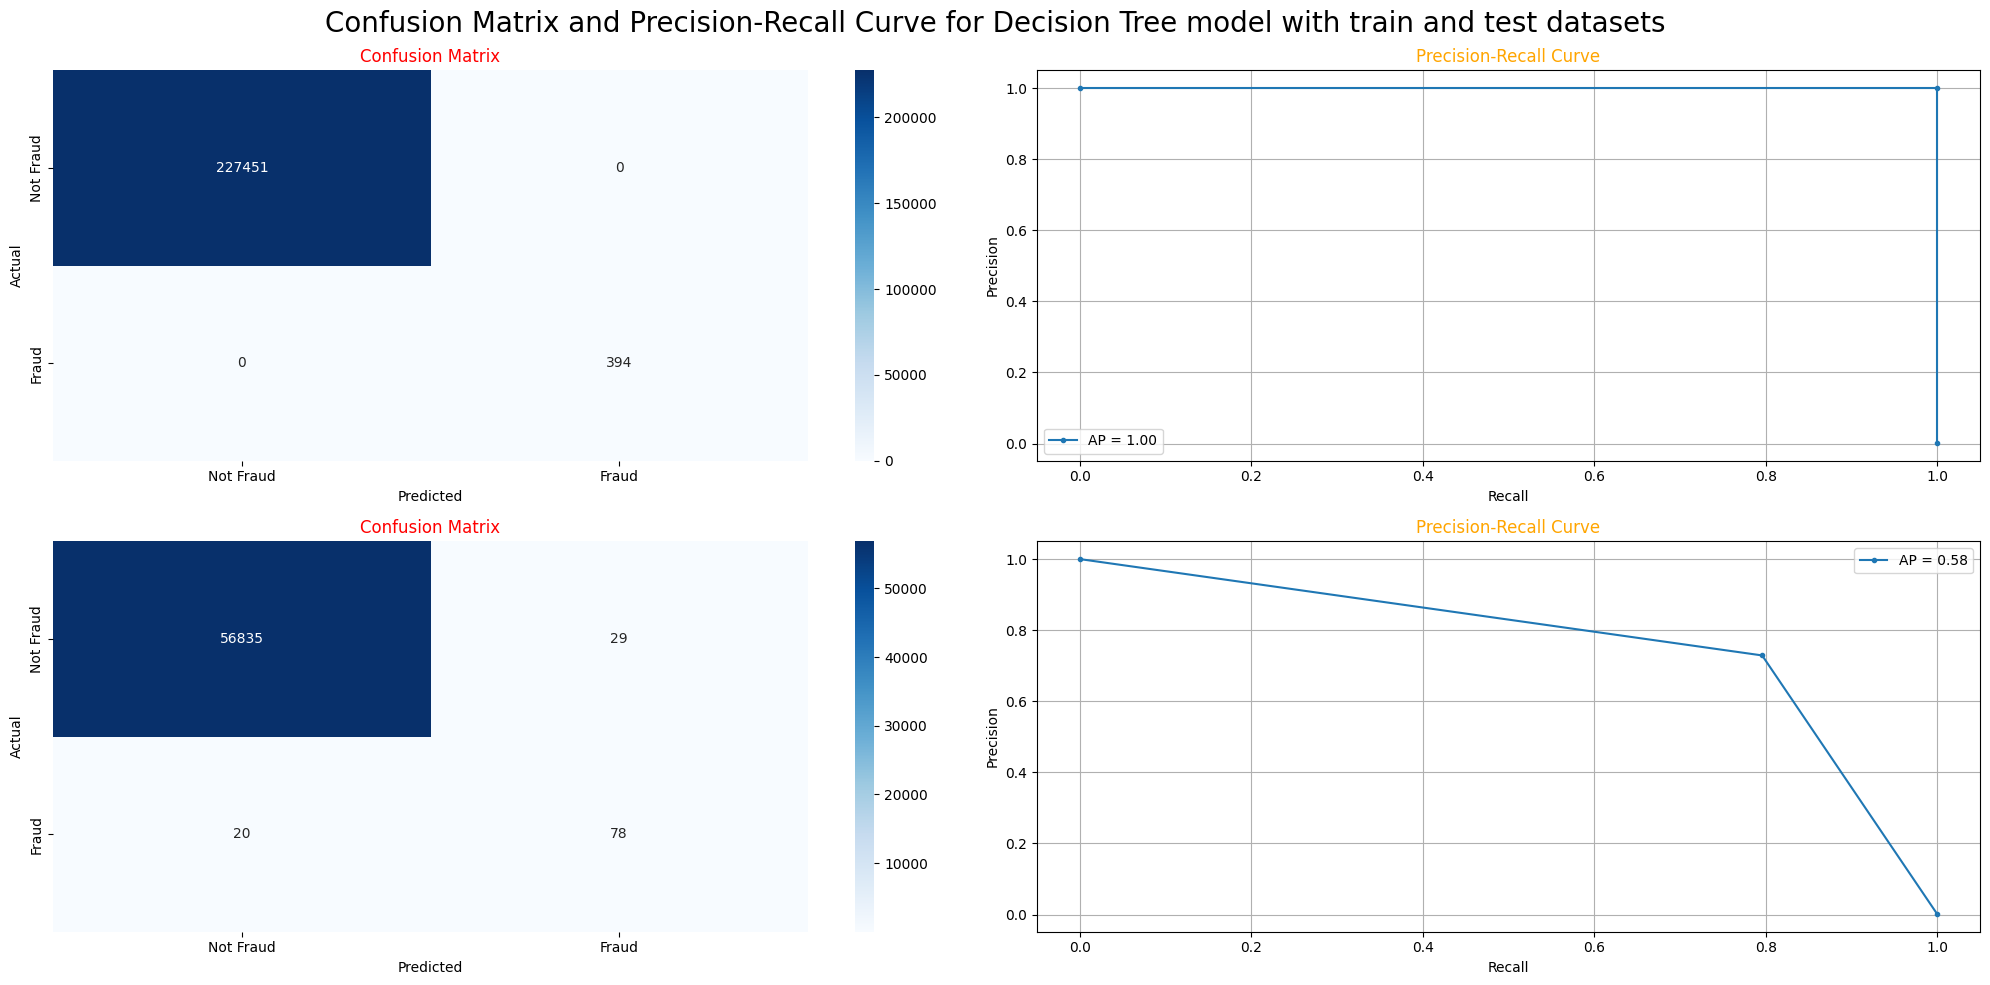

<Figure size 640x480 with 0 Axes>

In [40]:
prep = importlib.reload(prep)
prep.confusionM_RP_plot(y_train, DT_train_pred, y_test, DT_test_pred, model="Decision Tree")    #using scaled datase
prep.confusionM_RP_plot(y_train, DT_train_pred_unscaled, y_test, DT_test_pred_unscaled, model="Decision Tree")   #unscaled dataset

In [ ]:
#Observation:
    #The model is perfect for train data and not perface for test dataset, this shows the model is overfitted(not well generalized)
    #on test data Precision: 79.6% and 72.8% which is better to catch fraud transaction
    #Overall the model is overfitted. and it should be handled

In [41]:
#using Random forest model
prep = importlib.reload(prep)

#train the model
model_rf = prep.train_models(x_train, y_train, which_model="RandomForest")

#make prediction
y_pred_train_rf = prep.predict_model(model_rf, x_train)
y_pred_test_rf = prep.predict_model(model_rf, x_test)

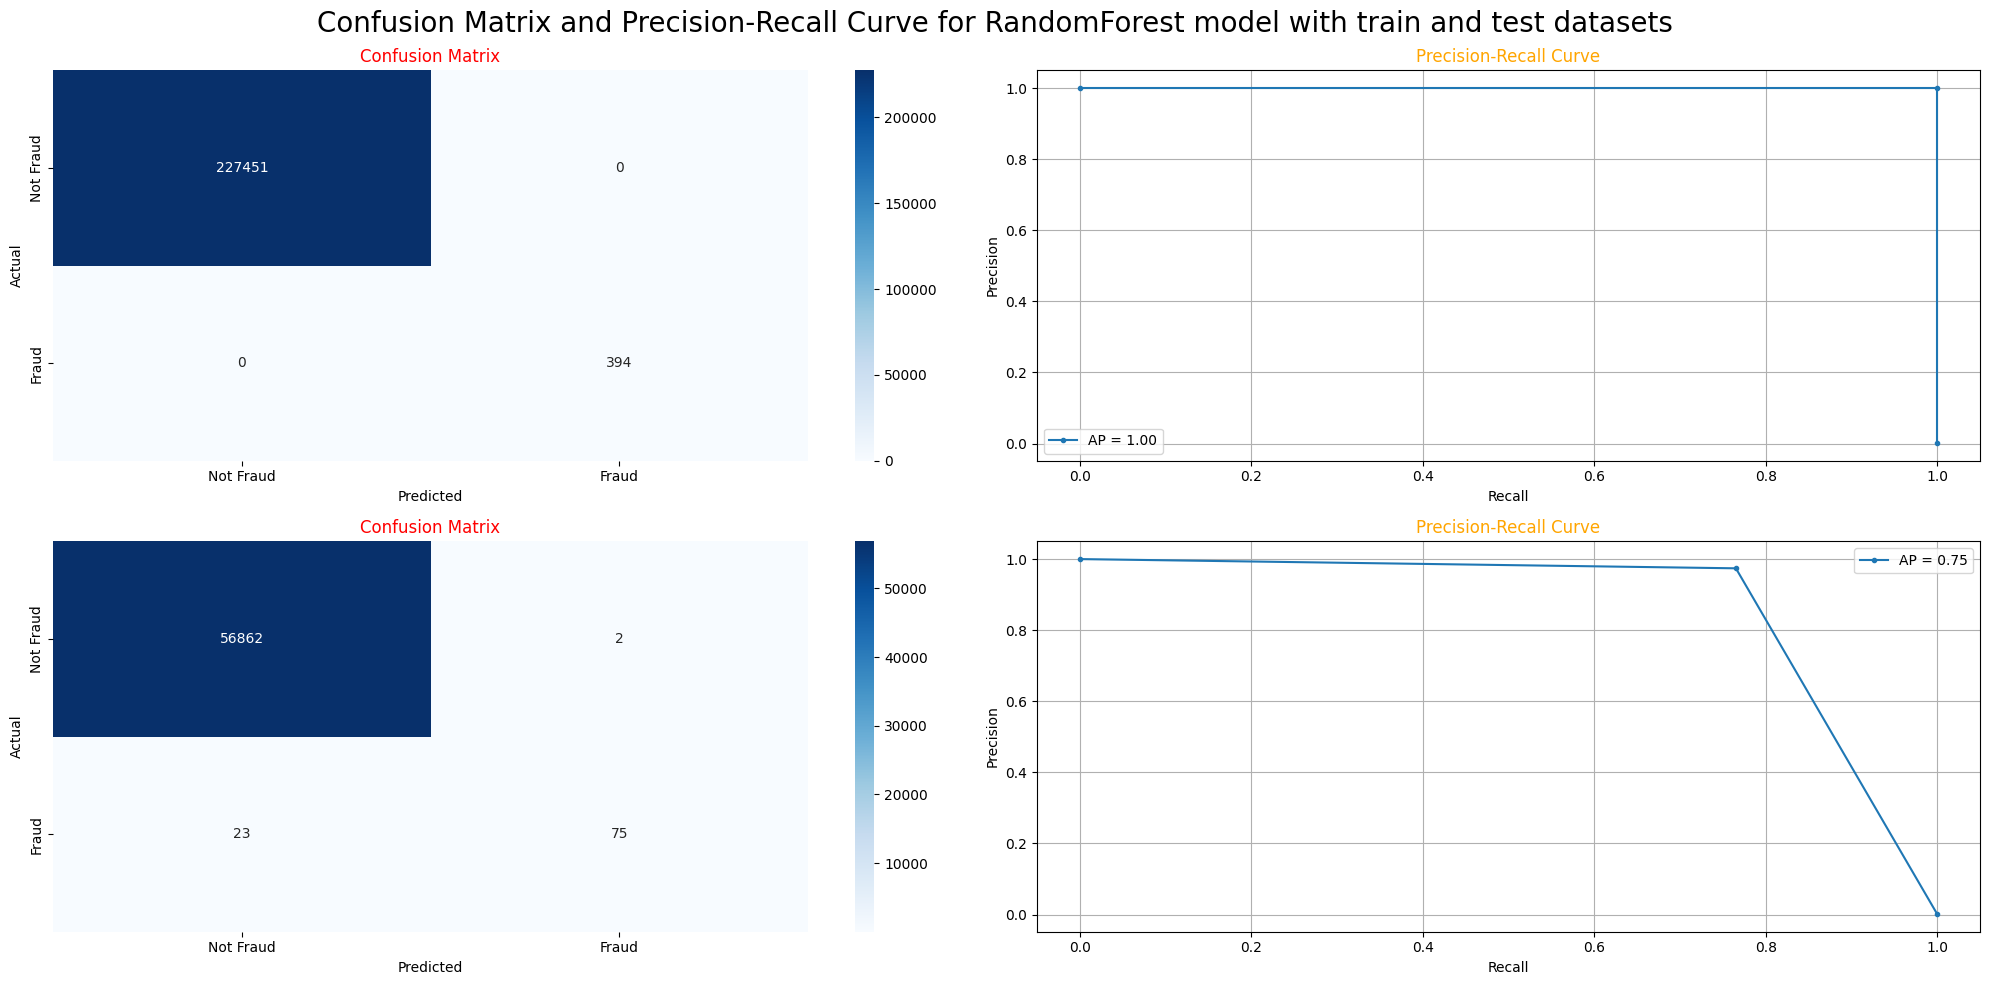

<Figure size 640x480 with 0 Axes>

In [42]:
prep.confusionM_RP_plot(y_train, y_pred_train_rf, y_test, y_pred_test_rf, model="RandomForest")

In [ ]:
#Observation:
    #On train data the model is perfect while on test data there is miss calssification.
    #On test data Precision: 97.4% and Recal:76.5% This shows the model is good at identifying positive cases but misses some.
    #Overall the model is overfitted

In [45]:
#using CatBoosting model
prep = importlib.reload(prep)

#train the model
model_cb = prep.train_models(x_train, y_train, which_model="catBoost")

#Make prediction
y_pred_train_cb = prep.predict_model(model_cb, x_train)
y_pred_test_cb = prep.predict_model(model_cb, x_test)

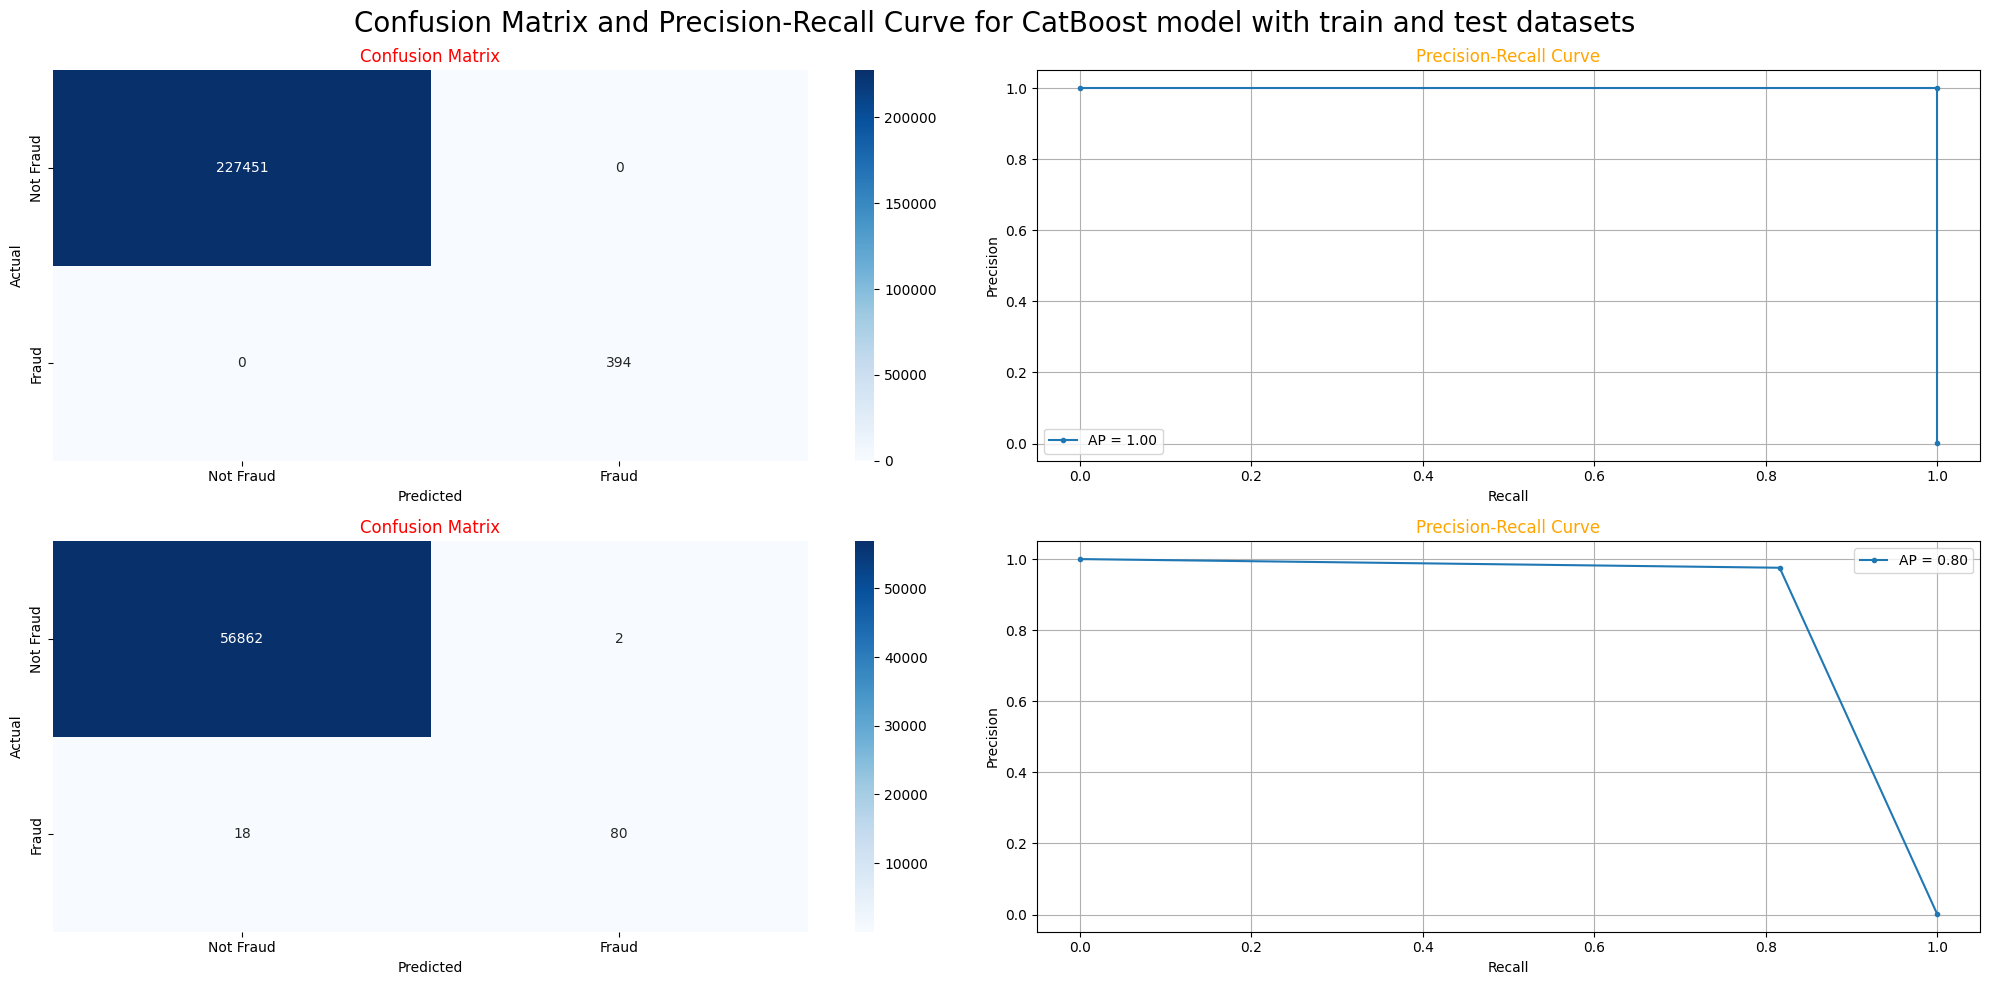

<Figure size 640x480 with 0 Axes>

In [46]:
prep.confusionM_RP_plot(y_train, y_pred_train_cb, y_test, y_pred_test_cb, model="CatBoost")

In [ ]:
#Observation:
    #on train data the model is classifing perfectly while on unsean data there are miss classifcaion
    #the model precision is good than recall.
    #PR-AUC are good than random forest and decision teree
    #the model are overfitted

In [47]:
#For XGBoostClassifier Model
prep = importlib.reload(prep)

#train the model using train dataset only
XGB_model = prep.train_models(x_train, y_train, which_model="XGBoost")

#make prediction
xgb_train_pred = prep.predict_model(XGB_model, x_train)
xgb_test_pred = prep.predict_model(XGB_model, x_test)

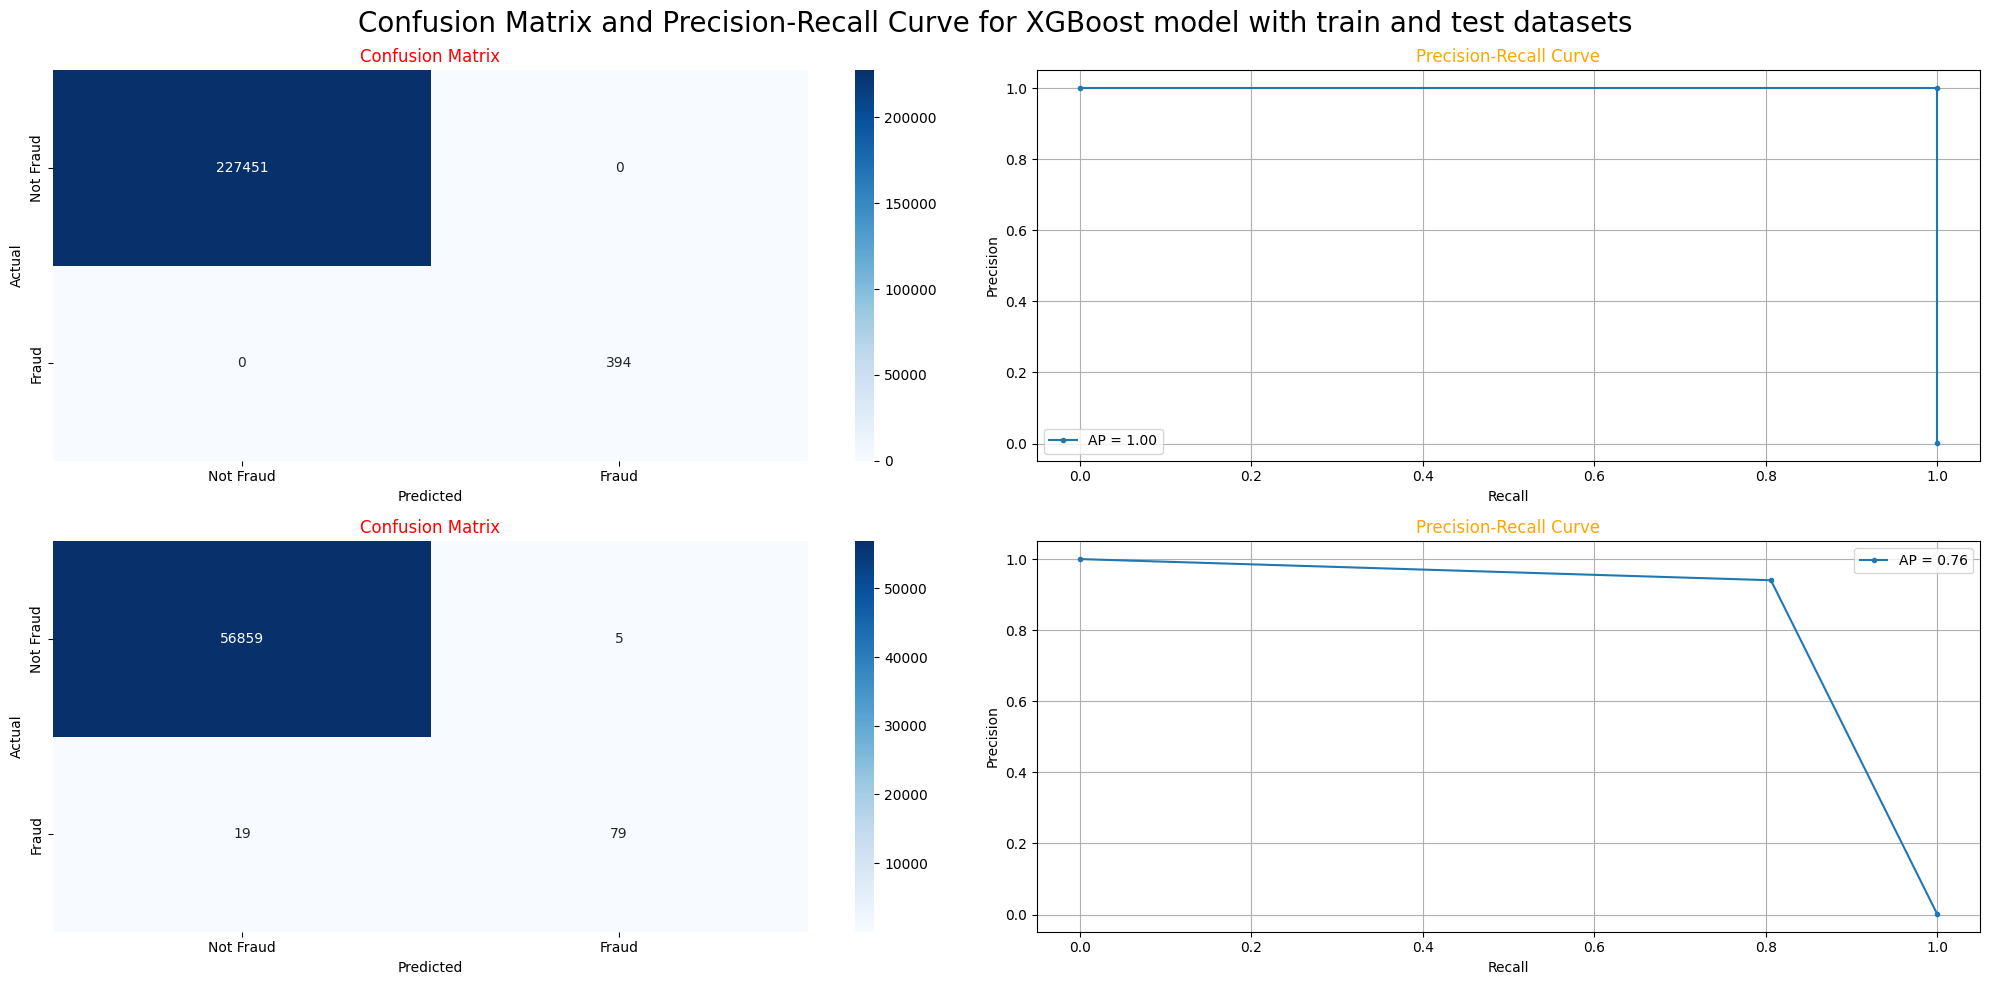

<Figure size 640x480 with 0 Axes>

In [48]:
prep.confusionM_RP_plot(y_train, xgb_train_pred, y_test, xgb_test_pred, model="XGBoost")

In [ ]:
#Overall Observation of the models:
    #CatBoost and XGBoost  model are the best perform and catBoost isthe winner for this case.
    #The tradeoff of precision vs recall are nice for this model

**Handle class imbalance**

In [6]:
prep = importlib.reload(prep)

#Train the model
cat_Boost_model = prep.catBoostModel(x_train, y_train)

#Prediction
x_train_pre, x_test_pre = prep.predict_model(cat_Boost_model, x_train, x_test)

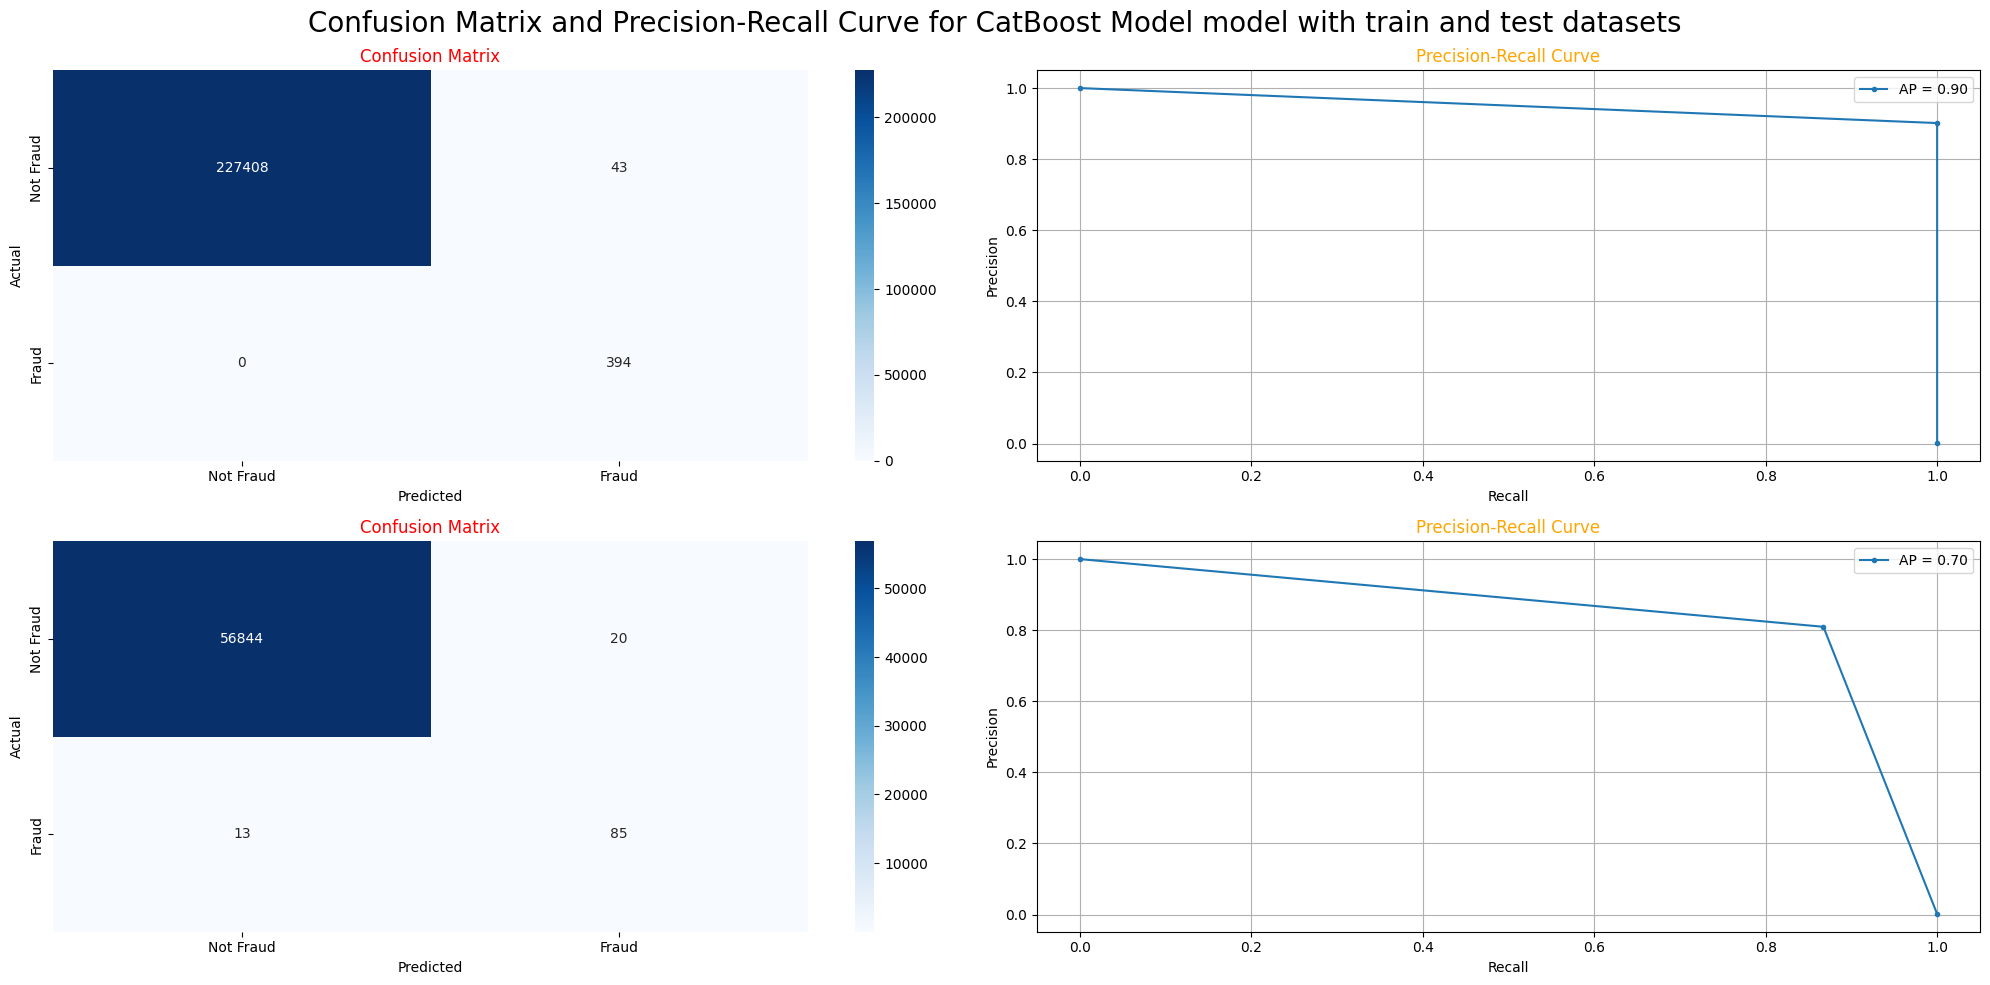

<Figure size 640x480 with 0 Axes>

In [8]:
prep.confusionM_RP_plot(y_train, x_train_pre, y_test, x_test_pre, model="CatBoost Model")

In [ ]:
#Observation:
    #accuracy is useless for this type of data
    #for test data precision:  80.0% and Recall: 86.7% better for fraud detection
    # The CatBoost model shows a high level of accuracy in detecting fraudulent transactions, as indicated by the confusion matrix and the precision-recall plot.
    #after handled class imbalanced the model pefrorms stronger than the previous for detecting fraudulent transaction

**Control Overfitting**

In [13]:
prep = importlib.reload(prep)

#train the model
model_OF = prep.cont_overfit(x_train, y_train)

#make predition
train_prediction, test_prediction = prep.predict_model(model_OF, x_train, x_test)

0:	learn: 0.9756798	total: 67.1ms	remaining: 53.6s
200:	learn: 0.9997822	total: 19.1s	remaining: 56.9s
400:	learn: 0.9999039	total: 37.8s	remaining: 37.6s
600:	learn: 0.9999767	total: 58.2s	remaining: 19.3s
799:	learn: 0.9999825	total: 1m 14s	remaining: 0us


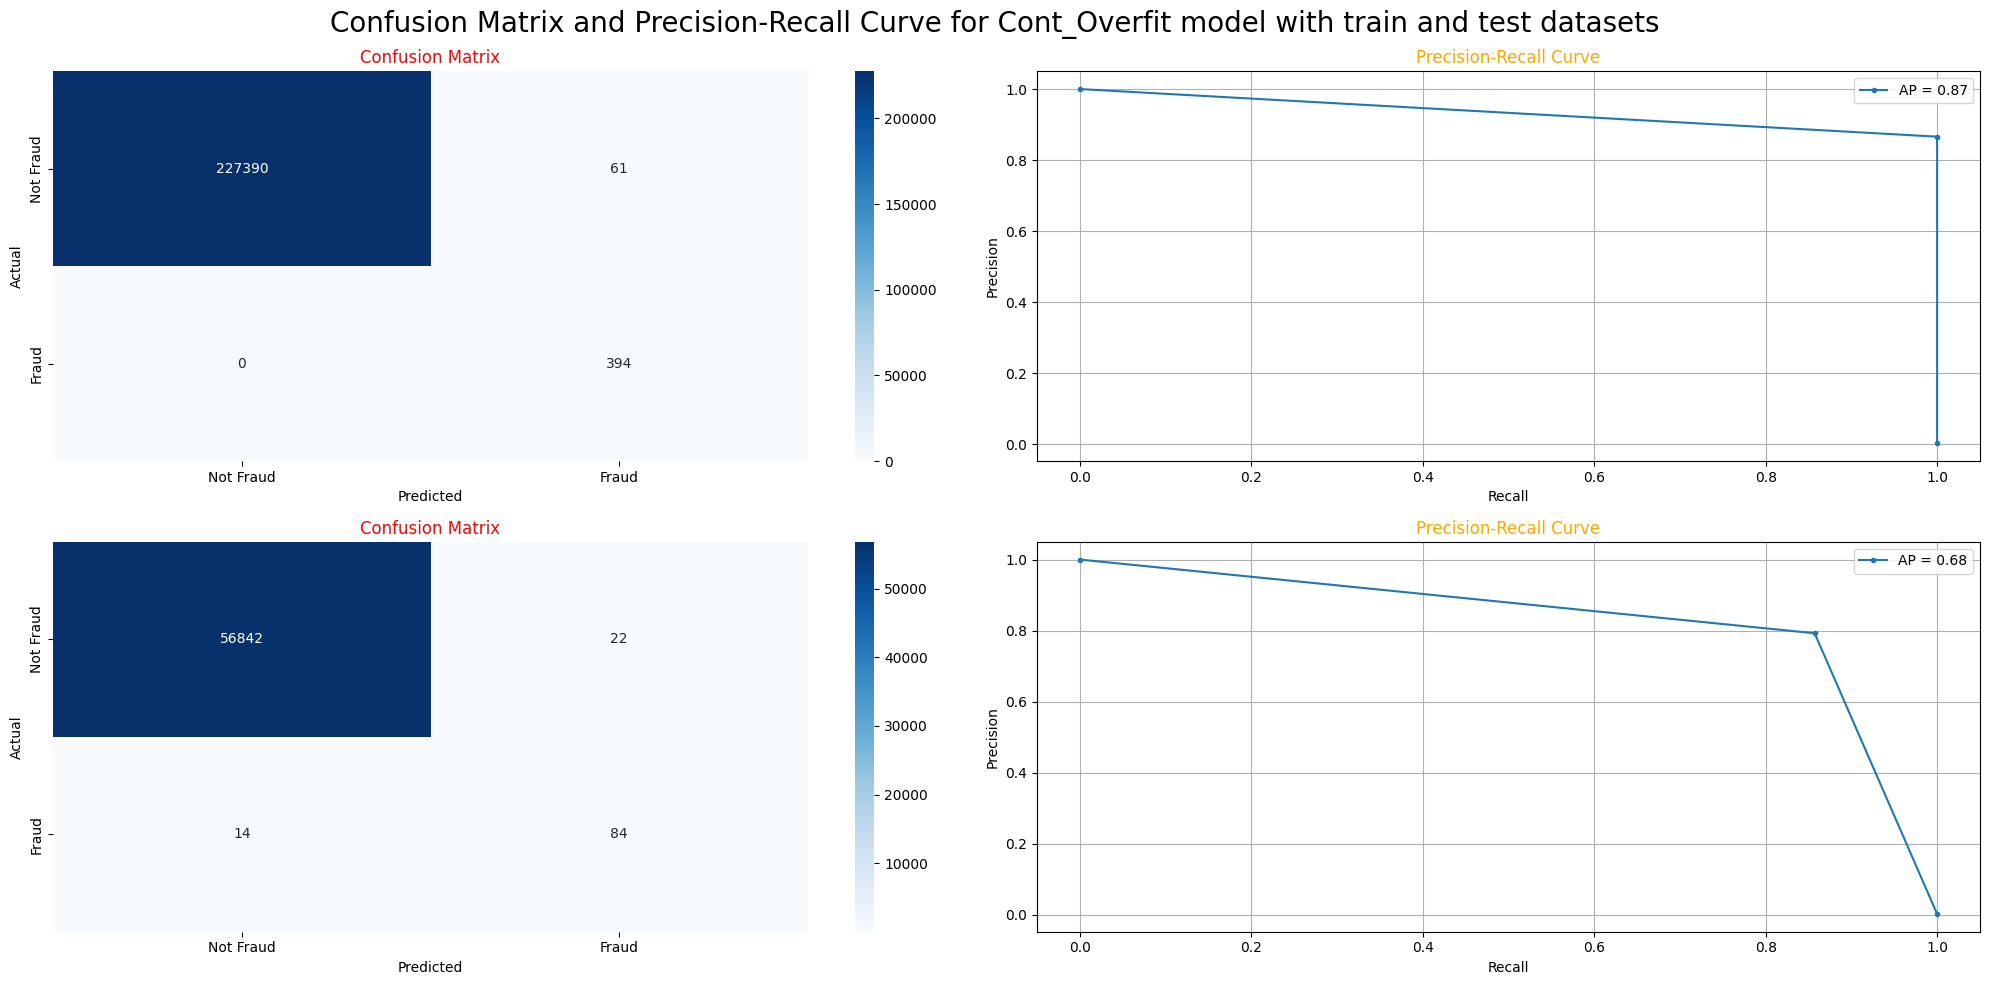

<Figure size 640x480 with 0 Axes>

In [14]:
prep.confusionM_RP_plot(y_train, train_prediction, y_test, test_prediction, model="Cont_Overfit")

In [ ]:
#Observation:
    #For test data precision:  80.0% and Recall: 86.7% which is better for fraud detection
    #The generalization also improveed

**Parameter Tunning and Regularization**

In [8]:
prep = importlib.reload(prep)

best_score, best_parameter = prep.param_tunning(x_train, y_train, x_test, y_test)

Best PR-AUC: 0.7980221431596173
Best Params: {'depth': 8, 'l2_leaf_reg': 10, 'learning_rate': 0.03, 'subsample': 0.7}


In [ ]:
#best parameters:
    #Best PR-AUC: 0.7980221431596173
    #Best Params: {'depth': 8, 'l2_leaf_reg': 10, 'learning_rate': 0.03, 'subsample': 0.7}

In [9]:
prep = importlib.reload(prep)

#train the final model with the best parameters
fin_model = prep.final_train(x_train, y_train, best_parameter)

0:	learn: 0.9833525	total: 212ms	remaining: 5m 18s
200:	learn: 0.9999054	total: 27.2s	remaining: 2m 55s
400:	learn: 0.9999814	total: 1m	remaining: 2m 46s
600:	learn: 0.9999890	total: 1m 27s	remaining: 2m 10s
800:	learn: 0.9999890	total: 1m 49s	remaining: 1m 35s
1000:	learn: 0.9999890	total: 2m 13s	remaining: 1m 6s
1200:	learn: 0.9999890	total: 2m 35s	remaining: 38.6s
1400:	learn: 0.9999890	total: 2m 58s	remaining: 12.6s
1499:	learn: 0.9999890	total: 3m 9s	remaining: 0us


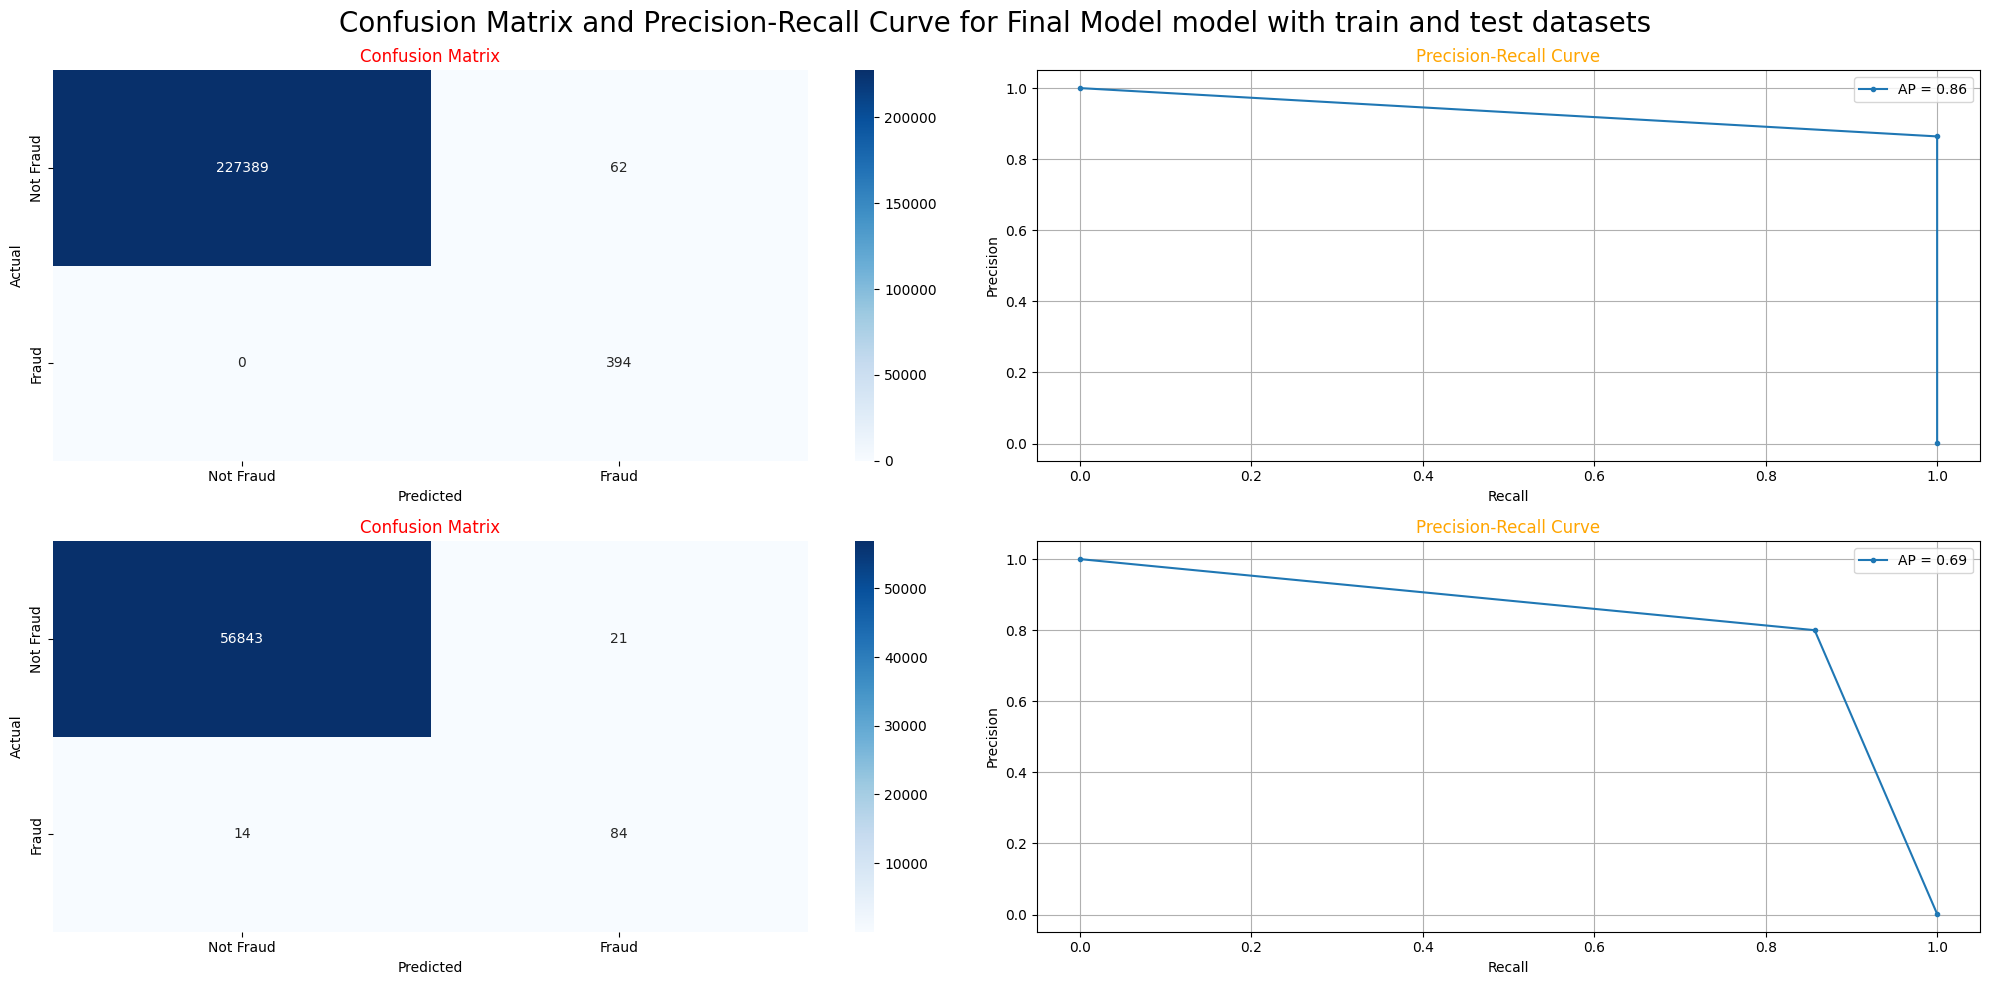

<Figure size 640x480 with 0 Axes>

In [10]:
prep = importlib.reload(prep)

train_pre, test_pre = prep.predict_model(fin_model, x_train, x_test)
prep.confusionM_RP_plot(y_train, train_pre, y_test, test_pre, model="Final Model")

In [ ]:
#Observatioin:
    #accuracy is not important for this dataset
    #On training dataset: precision: 86.4% and Recall:100% catch all fraud littil bit overfit(acceptable dou to class imbalance)
    #On test dataset: precision: 80.0% and Recall: 85.7% again recall greater than precision(the model focus catching fraud transaction)
    #PR Curve Train Average Precision curve(AP): 0.86 and Test AP: 0.69 have gap and need threshold tunning(but resonable)
    #Overall the model performs well in identifying fraudulent transactions with a good balance between precision and recall